In [1]:
using Test
using OffsetArrays
using Plots
using ColorSchemes
using TimerOutputs
using JLD2
include("../src/ladderDGA_core.jl")
include("../src/helpers.jl")
include("../src/IO.jl")
include("../src/build_chi_asympt.jl")
include("../src/dbg_tools.jl")

calc_χ₀_shell_sum_old (generic function with 1 method)

In [2]:
Nν_shell = 10
testf = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b14u1_small.jld2"#"../test/test_data/ED_s1.jld2"
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
n_iω = trunc(Int, size(χsp,3)/2);

LoadError: MethodError: no method matching BSE_Asym_Helper(::Vector{ComplexF64}, ::Vector{ComplexF64}, ::Vector{ComplexF64}, ::Int64, ::Float64, ::Int64, ::Int64, ::Int64)
[0mClosest candidates are:
[0m  BSE_Asym_Helper(::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, [91m::Any[39m) at ~/Hamburg/BSE_SC.jl/src/helpers.jl:149

In [3]:
f = jldopen(testf, "r")
sVk = sum(f["Vₖ"].^2)
n = f["nden"]
μ = f["μ"]
n_iν = f["grid_nFermi"]
shift = f["grid_shift"]
c2 = μ-U*(n/2)
c3 = (μ-U*(n/2))^2 + sVk + U^2 * (n/2) * (1 - n/2)

LoadError: UndefVarError: U not defined

# Spin Channel Tests

In [4]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 52
i_sp, Fsp_tr, χsp_tr,χspLoc_tr, λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=100, atol=1e-9);
i_ch, Fch_tr, χch_tr,χchLoc_tr, λch_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=100, atol=1e-9);

test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    test[helper.I_asympt[i]] = -U  - U^2 * real(sum(χsp[:,:,ωi])/β^2) 
    test[helper.I_asympt[i]] += (U^2/2) * real(helper.χch_asympt[helper.ind1_list[i]])
    test[helper.I_asympt[i]] += - (U^2/2) * real(helper.χsp_asympt[helper.ind1_list[i]])
    #test[helper.I_corner[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-4.2,-3.8), title="ν-ν', ω₀ test") #ν-ν': (-3.9,-3.5); ν+ν'+ω: (-2.9,-1.5)

LoadError: MethodError: no method matching BSE_Asym_Helper(::Vector{ComplexF64}, ::Vector{ComplexF64}, ::Vector{ComplexF64}, ::Int64, ::Float64, ::Int64, ::Int64, ::Int64)
[0mClosest candidates are:
[0m  BSE_Asym_Helper(::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, [91m::Any[39m) at ~/Hamburg/BSE_SC.jl/src/helpers.jl:149

In [5]:
using LinearAlgebra
#Fsp_shell10
plot(real.(diag(Fsp_tr[end])),ylims=(-4.2,-3.8))
plot!(real.(diag(Fsp_shell10)),ylims=(-4.2,-3.8))

LoadError: UndefVarError: Fsp_tr not defined

In [6]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 22
i_sp, Fsp_tr, χsp_tr,χspLoc_tr,λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    test[helper.I_asympt[i]] = -U  - U^2 * real(sum(χsp[:,:,ωi])/β^2) 
    test[helper.I_asympt[i]] += U^2/2 * real(helper.χch_asympt[helper.ind1_list[i]])
    test[helper.I_asympt[i]] += - U^2/2 * real(helper.χsp_asympt[helper.ind1_list[i]])
    #test[helper.I_corner[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-3.0,-1.3), title="ν-ν', ω₁ test") #ν-ν': (-3.9,-3.5); ν+ν'+ω: (-2.9,-1.5)

LoadError: MethodError: no method matching BSE_Asym_Helper(::Vector{ComplexF64}, ::Vector{ComplexF64}, ::Vector{ComplexF64}, ::Int64, ::Float64, ::Int64, ::Int64, ::Int64)
[0mClosest candidates are:
[0m  BSE_Asym_Helper(::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, [91m::Any[39m) at ~/Hamburg/BSE_SC.jl/src/helpers.jl:149

In [7]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 30
i_sp, Fsp_tr, χsp_tr,χspLoc_tr,λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    #test[helper.I_corner[i]] = real(helper.χpp_asympt[helper.ind1_list_corner[i,ωi]])
    #test[helper.I_corner[i]] = real(helper.χsp_asympt[helper.ind1_list_corner[i,ωi]])
    test[helper.I_asympt[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 *  real(helper.χpp_asympt[ll2[i]])
end1
heatmap(test, clim=(-1.4,-0.8), title="ν+ν'+ω, ω₁ test")

LoadError: MethodError: no method matching BSE_Asym_Helper(::Vector{ComplexF64}, ::Vector{ComplexF64}, ::Vector{ComplexF64}, ::Int64, ::Float64, ::Int64, ::Int64, ::Int64)
[0mClosest candidates are:
[0m  BSE_Asym_Helper(::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, [91m::Any[39m) at ~/Hamburg/BSE_SC.jl/src/helpers.jl:149

In [8]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 21
i_sp, Fsp_tr, χsp_tr,χspLoc_tr,λsp_tr = improve_χ_trace!(:sp, ωi, view(χsp,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    #test[helper.I_corner[i]] = real(helper.χpp_asympt[helper.ind1_list_corner[i,ωi]])
    #test[helper.I_corner[i]] = real(helper.χsp_asympt[helper.ind1_list_corner[i,ωi]])
    test[helper.I_asympt[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 *real(helper.χpp_asympt[ll2[i]])
end
p = if ωi == 22
    heatmap(test, clim=(-1.3,-1.2), title="ν+ν'+ω, ω₀ test") #(-3.3,-2.7)
else
    heatmap(test, clim=(-3.3,-2.7), title="ν+ν'+ω, ω₀ test")
end
display(p)

LoadError: MethodError: no method matching BSE_Asym_Helper(::Vector{ComplexF64}, ::Vector{ComplexF64}, ::Vector{ComplexF64}, ::Int64, ::Float64, ::Int64, ::Int64, ::Int64)
[0mClosest candidates are:
[0m  BSE_Asym_Helper(::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, [91m::Any[39m) at ~/Hamburg/BSE_SC.jl/src/helpers.jl:149

# Charge Channel Test

In [9]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 21
i_ch, Fch_tr, χch_tr,χchLoc_tr,λch_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fch_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    test[helper.I_asympt[i]] = U  - U^2/2 * real(sum(χch[:,:,ωi])/β^2) 
    test[helper.I_asympt[i]] += U^2 * real(helper.χch_asympt[helper.ind1_list[i]])
    test[helper.I_asympt[i]] += (3/2)* U^2 * real(helper.χsp_asympt[helper.ind1_list[i]])
    #test[helper.I_corner[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(0.5,2.3), title="ν-ν', ω₀ test") #ν-ν': (-3.9,-3.5); ν+ν'+ω: (-2.9,-1.5)

LoadError: MethodError: no method matching BSE_Asym_Helper(::Vector{ComplexF64}, ::Vector{ComplexF64}, ::Vector{ComplexF64}, ::Int64, ::Float64, ::Int64, ::Int64, ::Int64)
[0mClosest candidates are:
[0m  BSE_Asym_Helper(::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, [91m::Any[39m) at ~/Hamburg/BSE_SC.jl/src/helpers.jl:149

In [10]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 22
i_ch, Fch_tr, χch_tr,χcgLoc_tr,λch_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fch_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    test[helper.I_asympt[i]] = U  - U^2/2 * real(sum(χch[:,:,ωi])/β^2) 
    test[helper.I_asympt[i]] += 2*U^2 * real(helper.χch_asympt[helper.ind1_list[i]])
    test[helper.I_asympt[i]] += U^2 * real(helper.χsp_asympt[helper.ind1_list[i]])
    #test[helper.I_corner[i]] =  -U - U^2 * real(sum(χsp[:,:,ωi])/β^2)  + U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(0.5,2.3), title="ν-ν', ω₁ test") #ν-ν': (-3.9,-3.5); ν+ν'+ω: (-2.9,-1.5)

LoadError: MethodError: no method matching BSE_Asym_Helper(::Vector{ComplexF64}, ::Vector{ComplexF64}, ::Vector{ComplexF64}, ::Int64, ::Float64, ::Int64, ::Int64, ::Int64)
[0mClosest candidates are:
[0m  BSE_Asym_Helper(::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, [91m::Any[39m) at ~/Hamburg/BSE_SC.jl/src/helpers.jl:149

In [11]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 21
i_sp, Fsp_tr, χsp_tr,χspLoc_tr,λsp_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    #test[helper.I_corner[i]] = real(helper.χpp_asympt[helper.ind1_list_corner[i,ωi]])
    #test[helper.I_corner[i]] = real(helper.χsp_asympt[helper.ind1_list_corner[i,ωi]])
    test[helper.I_asympt[i]] =  U - U^2 * real(sum(χch[:,:,ωi])/β^2)  - U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-0.9,0.8), title="ν+ν'+ω, ω₀ test")

LoadError: MethodError: no method matching BSE_Asym_Helper(::Vector{ComplexF64}, ::Vector{ComplexF64}, ::Vector{ComplexF64}, ::Int64, ::Float64, ::Int64, ::Int64, ::Int64)
[0mClosest candidates are:
[0m  BSE_Asym_Helper(::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, [91m::Any[39m) at ~/Hamburg/BSE_SC.jl/src/helpers.jl:149

In [12]:
gImp, χ₀, χsp, χch, helper, U, β = setup(testf, Nν_shell);
ωi = 22
i_sp, Fsp_tr, χsp_tr,χspLoc_tr,λsp_tr = improve_χ_trace!(:ch, ωi, view(χch,:,:,ωi), view(χ₀,:,ωi), U, β, helper; Nit=20, atol=1e-9);
test = real.(deepcopy(Fsp_tr[3])[:,:])#zeros(Float64, size(χsp)[1:2]...)
for i in 1:length(helper.I_asympt)
    ll2 = helper.ind2_list[:,ωi]
    #test[helper.I_corner[i]] = real(helper.χpp_asympt[helper.ind1_list_corner[i,ωi]])
    #test[helper.I_corner[i]] = real(helper.χsp_asympt[helper.ind1_list_corner[i,ωi]])
    test[helper.I_asympt[i]] =  U - U^2 * real(sum(χch[:,:,ωi])/β^2)  - U^2 * real(helper.χpp_asympt[ll2[i]])
end
heatmap(test, clim=(-0.1,0.8), title="ν+ν'+ω, ω₁ test")

LoadError: MethodError: no method matching BSE_Asym_Helper(::Vector{ComplexF64}, ::Vector{ComplexF64}, ::Vector{ComplexF64}, ::Int64, ::Float64, ::Int64, ::Int64, ::Int64)
[0mClosest candidates are:
[0m  BSE_Asym_Helper(::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, [91m::Any[39m) at ~/Hamburg/BSE_SC.jl/src/helpers.jl:149

In [13]:
clim = (-3.5,0.5)#(-5,5)
p1 = plot(real.(λsp_tr[1]), title="λsp_s1 it 1",clim=clim)
p2 = plot(real.(λsp_tr[2]), title="λsp_s1 it 2",clim=clim)
p3 = plot(real.(λsp_tr[4]), title="λsp_s1 it 4",clim=clim)
p4 = plot(real.(λsp_tr[end]), title="λsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

LoadError: UndefVarError: λsp_tr not defined

In [14]:
clim = (-3.5,0.5)#(-5,5)
p1 = plot(real.(λch_tr[1]), title="λsp_s1 it 1",clim=clim)
p2 = plot(real.(λch_tr[2]), title="λsp_s1 it 2",clim=clim)
p3 = plot(real.(λch_tr[4]), title="λsp_s1 it 4",clim=clim)
p4 = plot(real.(λch_tr[end]), title="λsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

LoadError: UndefVarError: λch_tr not defined

In [15]:
clim = (-3.5,-3.0)#(-3.5,-2.5)
p1 = heatmap(real.(Fsp_tr[1]), title="Fsp_s1 it 1",clim=clim)
p2 = heatmap(real.(Fsp_tr[2]), title="Fsp_s1 it 2",clim=clim)
p3 = heatmap(real.(Fsp_tr[4]), title="Fsp_s1 it 4",clim=clim)
p4 = heatmap(real.(Fsp_tr[end]), title="Fsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

LoadError: UndefVarError: Fsp_tr not defined

In [16]:
clim = (-0.1,0.1)
p1 = heatmap(real.(χsp_tr[1]), title="χsp_s1 it 1",clim=clim)
p2 = heatmap(real.(χsp_tr[2]), title="χsp_s1 it 2",clim=clim)
p3 = heatmap(real.(χsp_tr[4]), title="χsp_s1 it 4",clim=clim)
p4 = heatmap(real.(χsp_tr[end]), title="χsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

LoadError: UndefVarError: χsp_tr not defined

# Full Convergence Tests

In [17]:
clim = (-3.25,-3.15)
p1 = heatmap(real.(Fsp_tr[1]), title="Fsp_s0 it 1",clim=clim)
p2 = heatmap(real.(Fsp_tr[2]), title="Fsp_s0 it 2",clim=clim)
p3 = heatmap(real.(Fsp_tr[3]), title="Fsp_s0 it 4",clim=clim)
p4 = heatmap(real.(Fsp_tr[end]), title="Fsp_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

LoadError: UndefVarError: Fsp_tr not defined

In [18]:
clim = (-3.3,-2.9)
p1 = heatmap(real.(Fsp_tr[1]), title="Fsp_s0 it 1",clim=clim)
p2 = heatmap(real.(Fsp_tr[2]), title="Fsp_s0 it 2",clim=clim)
p3 = heatmap(real.(Fsp_tr[3]), title="Fsp_s0 it 4",clim=clim)
p4 = heatmap(real.(Fsp_tr[end]), title="Fsp_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

LoadError: UndefVarError: Fsp_tr not defined

In [19]:
# χ_asympt only in corners
clim = (-1.0,0.68)
p1 = heatmap(real.(Fch_tr[1]) .- U, title="Fch_s0 it 1",clim=clim)
p2 = heatmap(real.(Fch_tr[2]) .- U, title="Fch_s0 it 2",clim=clim)
p3 = heatmap(real.(Fch_tr[3]) .- U, title="Fch_s0 it 4",clim=clim)
p4 = heatmap(real.(Fch_tr[end]) .- U, title="Fch_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

LoadError: UndefVarError: Fch_tr not defined

In [20]:
# everything treated equally in asympt
clim = (0.64,0.68)
p1 = heatmap(real.(Fch_tr[1]), title="Fch_s0 it 1",clim=clim)
p2 = heatmap(real.(Fch_tr[2]), title="Fch_s0 it 2",clim=clim)
p3 = heatmap(real.(Fch_tr[3]), title="Fch_s0 it 4",clim=clim)
p4 = heatmap(real.(Fch_tr[end]), title="Fch_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

LoadError: UndefVarError: Fch_tr not defined

In [21]:
size(Fch_tr[end])
plot(real.(Fch_tr[end][171,:]))
pl_arr = zeros(size(Fch_tr[end],1))
for i in 10:length(pl_arr)
    pl_arr[i] = real(Fch_tr[end][i,end-i+10])
end
plot(real.(Fch_tr[end][101,:]))
#plot!(pl_arr)

LoadError: UndefVarError: Fch_tr not defined

In [22]:
clim = (-0.002,0.002)
p1 = heatmap(real.(χch_tr[1]), title="χch it 1",clim=clim)
p2 = heatmap(real.(χch_tr[2]), title="χch it 2",clim=clim)
p3 = heatmap(real.(χch_tr[3]), title="χch it 4",clim=clim)
p4 = heatmap(real.(χch_tr[end]), title="χch it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

LoadError: UndefVarError: χch_tr not defined

In [23]:
# everything treated equally in asympt
clim = (0.64,0.68)
p1 = heatmap(real.(Fch_tr[1]), title="Fch_s0 it 1",clim=clim)
p2 = heatmap(real.(Fch_tr[2]), title="Fch_s0 it 2",clim=clim)
p3 = heatmap(real.(Fch_tr[3]), title="Fch_s0 it 4",clim=clim)
p4 = heatmap(real.(Fch_tr[end]), title="Fch_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

LoadError: UndefVarError: Fch_tr not defined

In [24]:
# everything treated equally in asympt
χch_a_pl = zeros(size(Fch_tr[1]))
χsp_a_pl = zeros(size(Fch_tr[1]))
χpp_a_pl = zeros(size(Fch_tr[1]))
I_all = union(helper.I_core, helper.I_asympt)
n_iω = trunc(Int,size(χsp,3)/2)
n_iν = trunc(Int,size(χsp,1)/2)
i1,i2 = aux_indices(I_all, ωi, n_iω, n_iν, helper.shift)
for i in 1:length(I_all)
    ii = I_all[i]
    χch_a_pl[ii] = (U^2/2)*real(helper.χch_asympt[i1[i]])
    χsp_a_pl[ii] = 3*(U^2/2)*real(helper.χsp_asympt[i1[i]])
    χpp_a_pl[ii] = -(U^2/2)*real(helper.χpp_asympt[i2[i]])
end
clim = (-0.05,0.05)
p1 = heatmap(χch_a_pl, title="(U^2/2)* χch_asympt",clim=clim)
p2 = heatmap(χsp_a_pl, title="3*(U^2/2)*χsp_asympt",clim=clim)
p3 = heatmap(χpp_a_pl, title="-(U^2/2)*χpp_asympt",clim=clim)
p4 = heatmap(χpp_a_pl, title="-(U^2/2)*χpp_asympt",clim=clim)
p = plot(p1,p2,p3,p3, layout=(2,2))

LoadError: UndefVarError: Fch_tr not defined

In [25]:
clim = (-3.5,0.5)#(-5,5)
p1 = plot(real.(λch_tr[1]), title="λch_s1 it 1",clim=clim)
p2 = plot(real.(λch_tr[2]), title="λch_s1 it 2",clim=clim)
p3 = plot(real.(λch_tr[3]), title="λch_s1 it 4",clim=clim)
p4 = plot(real.(λch_tr[end]), title="λch_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

LoadError: UndefVarError: λch_tr not defined

In [26]:
# \lambda only on sides
clim = (0.6,0.9)
p1 = heatmap(real.(Fch_tr[1]), title="Fch_s0 it 1",clim=clim)
p2 = heatmap(real.(Fch_tr[2]), title="Fch_s0 it 2",clim=clim)
p3 = heatmap(real.(Fch_tr[3]), title="Fch_s0 it 4",clim=clim)
p4 = heatmap(real.(Fch_tr[end]), title="Fch_s0 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

LoadError: UndefVarError: Fch_tr not defined

In [27]:
clim = (-3.5,0.5)#(-5,5)
p1 = plot(real.(λch_tr[1]), title="λsp_s1 it 1",clim=clim)
p2 = plot(real.(λch_tr[2]), title="λsp_s1 it 2",clim=clim)
p3 = plot(real.(λch_tr[4]), title="λsp_s1 it 4",clim=clim)
p4 = plot(real.(λch_tr[end]), title="λsp_s1 it end",clim=clim)
p = plot(p1,p2,p3,p4, layout=(2,2))

LoadError: UndefVarError: λch_tr not defined

In [28]:
clim = (-0.01,0.01)
p11 = heatmap(real.(χDMFTch_impr_s0[:,:,21]), title="χch_s0 it 1",clim=clim)
p21 = heatmap(real.(χDMFTch_impr_s1[:,:,151]), title="χch_s1 it 1",clim=clim)
p31 = heatmap(real.(χDMFTch_impr_s0[:,:,21]), title="χch_s0 end",clim=clim)
p41 = heatmap(real.(χDMFTch_impr_s1[:,:,151]), title="χch_s1 end",clim=clim)
plot(p11,p21,p31,p41, layout = (2, 2))

LoadError: UndefVarError: χDMFTch_impr_s0 not defined

In [29]:
clim = (-0.1,0.1)
p11 = heatmap(real.(χDMFTsp_impr_s0[:,:,21]), title="χch_s0 it 1",clim=clim)
p21 = heatmap(real.(χDMFTsp_impr_s1[:,:,151]), title="χch_s1 it 1",clim=clim)
p31 = heatmap(real.(χDMFTsp_impr_s0[:,:,21]), title="χch_s0 end",clim=clim)
p41 = heatmap(real.(χDMFTsp_impr_s1[:,:,151]), title="χch_s1 end",clim=clim)
plot(p11,p21,p31,p41, layout = (2, 2))

LoadError: UndefVarError: χDMFTsp_impr_s0 not defined

In [30]:

imp_dens_s0 = 0.5*sum(real.(χDMFTch_s0+χDMFTch_s0))/β_s0^3
imp_dens_impr_s0 = 0.5*sum(real.(χDMFTch_impr_s0+χDMFTch_impr_s0))/β_s0^3
imp_dens_s1 = 0.5*sum(real.(χDMFTch_s1+χDMFTch_s1))/β_s1^3
imp_dens_impr_s1 = 0.5*sum(real.(χDMFTch_impr_s1+χDMFTch_impr_s1))/β_s1^3
println("n/2 * (1 - n/2)     s0 naiive      s0 improved      s1 naiive      s1 improved")
println("                    $(round(imp_dens_s0,digits=8))      $(round(imp_dens_impr_s0,digits=8))      $(round(imp_dens_s1,digits=8))      $(round(imp_dens_impr_s1,digits=8))      ")

LoadError: UndefVarError: χDMFTch_s0 not defined

# Direct Asympt Local Tests
## local χ₀ Sum
This tests for the correct tails coefficients for χ₀ in local case.

In [31]:
testf = "/home/julian/Hamburg/ED_data/asympt_tests/ED_b14u1_small.jld2"
testfc = "/home/julian/Hamburg/ED_data/asympt_tests/config_14_small.toml"
testfc_plain = "/home/julian/Hamburg/ED_data/asympt_tests/config_14_small_plain.toml"
test_10_s0 = "/home/julian/Hamburg/ED_data/asympt_tests/config_10_s0_small.toml"
test_lambda = "/home/julian/Hamburg/ED_data/asympt_tests/b14u1_lambda.jld2"

using Plots
using OffsetArrays
using JLD2
using ColorSchemes
using TimerOutputs
include("../src/ladderDGA_core.jl")
include("../src/helpers.jl")
include("../src/IO.jl")
include("../src/build_chi_asympt.jl")
include("../src/dbg_tools.jl")

using Printf
using Query
using SeriesAcceleration
using TOML


using Pkg
Pkg.activate("/home/julian/Hamburg/Julia_lDGA/LadderDGA.jl")
using LadderDGA


sum_freq_full_f! = LadderDGA.sum_freq_full_f!
get_symm_f = LadderDGA.get_symm_f
F_from_χ = LadderDGA.F_from_χ
to_m_index = LadderDGA.to_m_index
_eltype = ComplexF64;

#using LadderDGA.BSE_SC

  Activating project at `~/Hamburg/Julia_lDGA/LadderDGA.jl`


In [32]:
f = testf
cf_plain = testfc_plain
wp, mP_p, sP_p, env_p, kGridsStr_p = readConfig(testfc_plain);
@timeit LadderDGA.to "setup" Σ_ladderLoc_p, Σ_loc_p, imp_density_p, kG_p, gLoc_fft_p, gLoc_rfft_p, Γsp_p, Γch_p, χDMFTsp_p, χDMFTch_p, locQ_sp_p, locQ_ch_p, χ₀Loc_p, gImp_p = setup_LDGA(kGridsStr_p[1], mP_p, sP_p, env_p);
FUpDo_p = F_from_χ(0.5 * (χDMFTch_p .- χDMFTsp_p), gImp_p[1,:], sP_p, mP_p.β);
Fsp_p   = F_from_χ(χDMFTsp_p, gImp_p[1,:], sP_p, mP_p.β);
@timeit LadderDGA.to "nl bblt" bubble_p = calc_bubble(gLoc_fft_p, gLoc_rfft_p, kG_p, mP_p, sP_p);
@timeit LadderDGA.to "nl xsp" nlQ_sp_p = calc_χγ(:sp, Γsp_p, bubble_p, kG_p, mP_p, sP_p);
@timeit LadderDGA.to "nl xch" nlQ_ch_p = calc_χγ(:ch, Γch_p, bubble_p, kG_p, mP_p, sP_p);
λ₀_p = calc_λ0(bubble_p, Fsp_p, locQ_sp_p, mP_p, sP_p)
Σ_ladder_p = calc_Σ(nlQ_sp_p, nlQ_ch_p, λ₀_p , gLoc_fft_p, kG_p, mP_p, sP_p);
Σ_ladder_ν_p = kintegrate(kG_p, Σ_ladder_p, 1)[1,:];

[ Info: Reading Inputs...
┌ Warning: Found Hubbard Parameters in input .jld2, ignoring config.toml
└ @ LadderDGA ~/Hamburg/Julia_lDGA/LadderDGA.jl/src/IO.jl:76
┌ Warning: Frequency file not found, reconstructing grid from config.
└ @ LadderDGA ~/Hamburg/Julia_lDGA/LadderDGA.jl/src/IO.jl:86
[ Info: Setting up calculation for kGrid 3Dsc-0.2041241452319315 of size 4
[ Info: setting usable ranges of sp and ch channel from 41:61 and 41:61 to the same range of 41:61
┌ Warning: TODO: update local omega sum with correction, update get_sum_helper to return tail sub
└ @ LadderDGA ~/Hamburg/Julia_lDGA/LadderDGA.jl/src/helpers.jl:153
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_sp(41:61) = 0.319, χLoc_ch(41:61) = 0.1339
└ sum χupup check (fit, tail sub, tail sub + fit, expected): 0.2038158510278856 ?=? 0.2264243253078799 ?≈? 0.22642432530787995 ≟ 0.25"
[ Info: sp channel: |∑χ(q=0,ω≠0)| = 1.468678449096 ≟ 0
[ Info: ch channel: |∑χ(q=0,ω≠0)| = 1.5145764

In [33]:
f = testf
cf = testfc
wp, mP, sP, env, kGridsStr = readConfig(testfc);
Σ_ladderLoc, Σ_loc, imp_density, kG, gLoc_fft, gLoc_rfft, Γsp, Γch, χDMFTsp, χDMFTch, locQ_sp, locQ_ch, χ₀Loc, gImp = setup_LDGA(kGridsStr[1], mP, sP, env);
FUpDo = F_from_χ(0.5 * (χDMFTch .- χDMFTsp), gImp[1,:], sP, mP.β);
Fsp = F_from_χ(χDMFTsp, gImp[1,:], sP, mP.β);
Fch = F_from_χ(χDMFTch, gImp[1,:], sP, mP.β);
@timeit LadderDGA.to "nl bblt" bubble = calc_bubble(gLoc_fft, gLoc_rfft, kG, mP, sP);
@timeit LadderDGA.to "nl xsp" nlQ_sp = calc_χγ(:sp, Γsp, bubble, kG, mP, sP);
@timeit LadderDGA.to "nl xch" nlQ_ch = calc_χγ(:ch, Γch, bubble, kG, mP, sP);
λ₀ = calc_λ0(bubble, Fsp, locQ_sp, mP, sP)
Σ_ladder = calc_Σ(nlQ_sp, nlQ_ch, λ₀, gLoc_fft, kG, mP, sP);
Σ_ladder_ν = kintegrate(kG, Σ_ladder, 1)[1,:];

[ Info: Reading Inputs...
┌ Warning: Found Hubbard Parameters in input .jld2, ignoring config.toml
└ @ LadderDGA ~/Hamburg/Julia_lDGA/LadderDGA.jl/src/IO.jl:76
┌ Warning: Frequency file not found, reconstructing grid from config.
└ @ LadderDGA ~/Hamburg/Julia_lDGA/LadderDGA.jl/src/IO.jl:86
[ Info: Setting up calculation for kGrid 3Dsc-0.2041241452319315 of size 4
┌ Warning: DBG: currently forcing omega FULL range!!
└ @ LadderDGA ~/Hamburg/Julia_lDGA/LadderDGA.jl/src/ladderDGATools_singleCore.jl:85
┌ Warning: DBG: currently forcing omega FULL range!!
└ @ LadderDGA ~/Hamburg/Julia_lDGA/LadderDGA.jl/src/ladderDGATools_singleCore.jl:85
[ Info: setting usable ranges of sp and ch channel from 1:101 and 1:101 to the same range of 1:101
┌ Warning: TODO: update local omega sum with correction, update get_sum_helper to return tail sub
└ @ LadderDGA ~/Hamburg/Julia_lDGA/LadderDGA.jl/src/helpers.jl:153
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_sp(1

In [34]:
f = testf
cf = testfc
wp, mP, sP, env, kGridsStr = readConfig(testfc);
@timeit LadderDGA.to "setup" Σ_ladderLoc, Σ_loc, imp_density, kG, gLoc, gLoc_fft, Γsp, Γch, χDMFTsp, χDMFTch, locQ_sp, locQ_ch, χ₀Loc, gImp = setup_LDGA(kGridsStr[1], mP, sP, env);
#FUpDo = F_from_χ(0.5 * (χDMFTch .- χDMFTsp), gImp[1,:], sP, mP.β);
#Fsp = F_from_χ(χDMFTsp, gImp[1,:], sP, mP.β);
#Fch = F_from_χ(χDMFTch, gImp[1,:], sP, mP.β);
@timeit LadderDGA.to "nl bblt" bubble = calc_bubble(gLoc_fft, kG, mP, sP);
@timeit LadderDGA.to "nl xsp" @inbounds nlQ_sp = calc_χγ(:sp, Γsp, bubble, kG, mP, sP);
#@timeit LadderDGA.to "nl xch" nlQ_ch = calc_χγ(:ch, Γch, bubble, kG, mP, sP);
#λ₀ = calc_λ0(bubble, Fsp, locQ_sp, mP, sP)
#Σ_ladder = calc_Σ(nlQ_sp, nlQ_ch, λ₀, gLoc_fft, kG, mP, sP);
#Σ_ladder_ν = kintegrate(kG, Σ_ladder, 1)[1,:];

[ Info: Reading Inputs...
┌ Warning: Found Hubbard Parameters in input .jld2, ignoring config.toml
└ @ LadderDGA ~/Hamburg/Julia_lDGA/LadderDGA.jl/src/IO.jl:76
┌ Warning: Frequency file not found, reconstructing grid from config.
└ @ LadderDGA ~/Hamburg/Julia_lDGA/LadderDGA.jl/src/IO.jl:86
[ Info: Setting up calculation for kGrid 3Dsc-0.2041241452319315 of size 4
┌ Warning: DBG: currently forcing omega FULL range!!
└ @ LadderDGA ~/Hamburg/Julia_lDGA/LadderDGA.jl/src/ladderDGATools_singleCore.jl:85
┌ Warning: DBG: currently forcing omega FULL range!!
└ @ LadderDGA ~/Hamburg/Julia_lDGA/LadderDGA.jl/src/ladderDGATools_singleCore.jl:85
[ Info: setting usable ranges of sp and ch channel from 1:101 and 1:101 to the same range of 1:101
┌ Warning: TODO: update local omega sum with correction, update get_sum_helper to return tail sub
└ @ LadderDGA ~/Hamburg/Julia_lDGA/LadderDGA.jl/src/helpers.jl:153
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_sp(1

LoadError: MethodError: no method matching calc_bubble(::OffsetMatrix{ComplexF64, Matrix{ComplexF64}}, ::Dispersions.KGrid{Dispersions.cP, 3}, ::ModelParameters, ::SimulationParameters)
[0mClosest candidates are:
[0m  calc_bubble(::OffsetMatrix{ComplexF64, Matrix{ComplexF64}}, [91m::OffsetMatrix{ComplexF64, Matrix{ComplexF64}}[39m, [91m::Dispersions.KGrid[39m, [91m::ModelParameters[39m, [91m::SimulationParameters[39m; local_tail) at ~/Hamburg/Julia_lDGA/LadderDGA.jl/src/ladderDGATools_singleCore.jl:2

In [35]:
usable_p = real.(locQ_sp_p.χ[1,:]) .> 0
plot(collect(1:size(locQ_sp_p.χ,2)) .-  sP.n_iω .- 1, real.(locQ_sp.χ[1,:]), ylabel=L"\chi^\omega_\mathrm{m}", xlabel=L"\omega_m", label="improved", markershape=:auto, color=:red)
plot!(collect(1:size(locQ_sp_p.χ,2))[usable_p]  .- sP.n_iω .- 1, real.(locQ_sp_p.χ[1,usable_p]), color=:green, label="plain", markershape=:auto)

LoadError: LoadError: UndefVarError: @L_str not defined
in expression starting at In[35]:2

In [36]:
λnew = LadderDGA.extended_λ_clean(nlQ_sp, nlQ_ch, gLoc_fft, 
                    λ₀, kG, mP, sP)

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.1, 0.1]
 * Zero: [0.013801853578471837, 1.5930963458884693]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [37]:
λnew_2 = λ_correction(:sp_ch, 0.0, nlQ_sp, nlQ_ch, gLoc_fft, 
                        λ₀, kG, mP, sP)

[ Info: Using DMFT GF for second condition in new lambda correction
┌ Info: start: 
│   λl .+ (λr .- λl) ./ 2 =
│    2-element Vector{Float64}:
│     0.017505345447004377
└     1.3872443494024818
Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.017505345447004377, 1.3872443494024818]
 * Zero: [0.013358653631594806, 1.6308694193008393]
 * Inf-norm of residuals: 0.000000
 * Iterations: 3
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 4
 * Jacobian Calls (df/dx): 4
┌ Warning: extended λ correction dbg string: 
│   dbg_string = "correct_margins: λl=[-0.032, -2.537], λr=[0.0, 0.0] F=[0.022, 0.023]\n[-0.03200977453166515, -2.5366753817645376] ...... [0.0640195490633303, 5.073350763529075]\ncorrect_margins: λl=[-0.032, -2.537], λr=[0.064, 5.073]Fr=[-0.031, -0.031]\n1: λl=[-0.032, -2." ⋯ 1024 bytes ⋯ "]\n5: λl=[0.016, 1.2683], λm=[0.019, 1.5062], λr=[0.022, 1.744]\n    Fl=[

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.017505345447004377, 1.3872443494024818]
 * Zero: [0.013358653631594806, 1.6308694193008393]
 * Inf-norm of residuals: 0.000000
 * Iterations: 3
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 4
 * Jacobian Calls (df/dx): 4

In [38]:
### using Dispersions
using FFTW
function calc_χ₀_notebook(G, kG, mP, sP)
    Nk = size(G,1)
    res = zeros(ComplexF64, 1:Nk, 2*sP.n_iν, 2*sP.n_iω+1)
    res_fft = zeros(ComplexF64, 1:Nk, 2*sP.n_iν, 2*sP.n_iω+1)
    res_red = zeros(ComplexF64, length(kG.kMult), 2*sP.n_iν, 2*sP.n_iω+1)
    ifft_p(x) = Dispersions.ifft_post(kG,x)
    sum(kG.kMult) != Nk && error("K-Grids not matching")
    for (ωi,ωn) in enumerate(-sP.n_iω:sP.n_iω)
        for (νi,νn) in enumerate( (-sP.n_iν:sP.n_iν-1) .- trunc(Int64,sP.shift*ωn/2)) 
            ωn, νn = LadderDGA.OneToIndex_to_Freq(ωi, νi, sP) 
            if ωn == -3
                #println("$ωn : $νn")
            end
            for qi in 1:Nk
                for ki in 1:Nk
                    res[qi, νi, ωi] += G[ki,νn]*G[mod1(ki+qi,Nk),νn+ωn]
                end
            end
            res_fft[:, νi, ωi] =  ifft_p(ifft(fft(reshape(G[:,νn],gridshape(kG))) .* fft(reshape(G[:,νn+ωn],gridshape(kG)))))[:]
            #res_fft[:, νi, ωi] =  ifft_p(ifft(fft(G[:,νn]) .* fft(G[:,νn+ωn])))[:]

            res_red[:, νi, ωi] += reduceKArr(kG, reshape(res[:, νi, ωi],gridshape(kG)))
        end
    end
    return (-res .* mP.β) ./ Nk, (-res_red .* mP.β) ./ Nk, (-res_fft .* mP.β) ./ Nk
end


function calc_χγ_notebook(type::Symbol, Γr, χ₀, kG, mP, sP)
    s = type === :ch ? -1 : 1
        
    χ₀d = typeof(χ₀) === χ₀T ? χ₀.data :  χ₀
    Nq = length(kG.kMult)
    Nν = 2*sP.n_iν
    Nω  = size(χ₀d,3)
    γ = LadderDGA.γT(undef, Nq, Nν, Nω)
    χ = LadderDGA.χT(undef, Nq, Nω)
    
    for ωi in 1:Nω
        for qi in 1:Nq
            χννpω = deepcopy(Γr[:,:,ωi])
            for l in 1:Nν
                χννpω[l,l] = Γr[l,l,ωi] + 1.0/χ₀d[qi,l,ωi]
            end
            χ[qi, ωi] = sum(inv(χννpω))/(mP.β^2)
        end
    end
    return χ
end

calc_χγ_notebook (generic function with 1 method)

In [39]:
function calc_bubble_notebook(Gνω::GνqT, kG, mP::ModelParameters, sP::SimulationParameters; local_tail=false)
    #TODO: fix the size (BSE_SC inconsistency)
    data = Array{ComplexF64,3}(undef, length(kG.kMult), 2*(sP.n_iν+sP.n_iν_shell), 2*sP.n_iω+1)
    for (ωi,ωn) in enumerate(-sP.n_iω:sP.n_iω)
        #TODO: fix the offset (BSE_SC inconsistency)
        for (νi,νn) in enumerate((-sP.n_iν:sP.n_iν-1) .- trunc(Int,sP.shift*ωn/2))
            conv_fft!(kG, view(data,:,νi,ωi), reshape(Gνω[:,νn].parent,gridshape(kG)), reshape(Gνω[:,νn+ωn].parent,gridshape(kG)))
            data[:,νi,ωi] .*= -mP.β
        end
    end
    #TODO: not necessary after real fft
    data = _eltype === Float64 ? real.(data) : data

    #TODO: move tail calculation to definition of GF (GF should know about its tail)
    t1, t2 = if local_tail
        convert.(ComplexF64, [mP.U*mP.n/2 - mP.μ]),
        mP.sVk + (mP.U^2)*(mP.n/2)*(1-mP.n/2)
    else
        convert.(ComplexF64, kG.ϵkGrid .+ mP.U*mP.n/2 .- mP.μ),
        (mP.U^2)*(mP.n/2)*(1-mP.n/2)
    end
    return χ₀T(data, kG, t1, t2, mP.β, -sP.n_iω:sP.n_iω, sP.n_iν, Int(sP.shift)) 
end

calc_bubble_notebook (generic function with 1 method)

In [40]:
using DelimitedFiles
#ν_n =  π .* (2 .* (0:length(gImp[1,0:end])-1) .+ 1)/mP.β
#"/home/julian/Hamburg/Fortran_lDGA/ladderDGA_bubble_test/"
#open("/home/julian/Hamburg/Fortran_lDGA/ladderDGA_bubble_test/gm_wim", "w") do io
#    writedlm(io, rpad.(lpad.(round.([ν_n real(gImp[1,0:end]) imag(gImp[1,0:end])],digits=8), 3, " "), 12, "0"), "     ")
#end
#open("/home/julian/Hamburg/Fortran_lDGA/ladderDGA_bubble_test/g0mand", "w") do io
#    g0 = load(testf, "g0")
#    writedlm(io, rpad.(lpad.(round.([ν_n real(1 ./ g0[1:length(gImp[1,0:end])]) imag(1 ./ g0[1:length(gImp[1,0:end])])],digits=8), 3, " "), 12, "0"), "     ")
#end

In [41]:
using Test
using OffsetArrays
using JLD2
using Plots
include("../src/ladderDGA_core.jl")
include("../src/helpers.jl")
include("../src/IO.jl")
include("../src/build_chi_asympt.jl")
include("../src/dbg_tools.jl")
Nν_shell = sP.n_iν_shell

#gImp_loc_test, χ₀_loc_test, χsp_loc_test, χch_loc_test, helper, U, β = setup(testf, Nν_shell);

β = mP.β
λch_ed_asym, λsp_ed_asym, λpp_ed_asym = load(test_lambda, "λch", "λsp", "λpp");
λch_ed_amp_asym, λsp_ed_amp_asym, λpp_ed_amp_asym = load(test_lambda, "λch_amp", "λsp_amp", "λpp_amp");
γch_ed_asym, γsp_ed_asym, γpp_ed_asym = load(test_lambda, "γch", "γsp", "γpp");
χsp_ed, χch_ed = load(testf, "χ_sp_asympt","χ_ch_asympt") ./ β^2 ;

In [42]:
f = jldopen(testf, "r")
Σ_loc_in = 1 ./ f["g0"] .- 1 ./ f["gImp"];
sVk = sum(f["Vₖ"].^2)
n = f["nden"]
μ = f["μ"]
n_iν = f["grid_nFermi"]
shift = f["grid_shift"]
close(f)

function χ₀_shell_sum_core_notebook(β::Float64, ω_ind_grid::AbstractVector{Int}, n_iν::Int, shift)
   res = OffsetArray(zeros(ComplexF64, length(ω_ind_grid), 4), ω_ind_grid, 1:4)
   iω_grid = iω_array(β, ω_ind_grid)
   for ωn in ω_ind_grid
        si = shift*trunc(Int,ωn/2)
        iν_ind_grid = (-n_iν-abs(minimum(ω_ind_grid))-si):(n_iν+abs(maximum(ω_ind_grid))-si-1)
        iν_grid = OffsetArray(iν_array(β, iν_ind_grid), iν_ind_grid)
        for νn in (-n_iν-si):(n_iν-si-1)
            res[ωn,1] += 1/(iν_grid[νn]^1 * iν_grid[νn+ωn]^1) 
            res[ωn,2] += 1/(iν_grid[νn]^2 * iν_grid[νn+ωn]^1) + 1/(iν_grid[νn]^1 * iν_grid[νn+ωn]^2) 
            res[ωn,3] += 1/(iν_grid[νn]^2 * iν_grid[νn+ωn]^2) 
            res[ωn,4] += 1/(iν_grid[νn]^3 * iν_grid[νn+ωn]^1) + 1/(iν_grid[νn]^1 * iν_grid[νn+ωn]^3) 
        end
    end
    return res
end

function χ₀_shell_sum_notebook(core::OffsetArray{ComplexF64,2}, ωn::Int, β::Float64, c1::Float64, c2::Float64, c3::Float64)::ComplexF64
    res = (core[ωn,1] + c1*core[ωn,2] + c2*core[ωn,3] + c3*core[ωn,4])/β
    ωn2 = 2*(2*ωn*π/β)^2
    res += ωn == 0 ? (β/4-c2*β^3/48-c3*β^3/24) : ((c3-c2)*β/ωn2)
    return res
end

function calc_χλ_notebook(type::Symbol, shell_sum_core, ωn::Int, χ::AbstractArray{ComplexF64,2}, χ₀::AbstractArray{ComplexF64,1}, U::Float64, β::Float64, c1::Float64, c2::Float64, c3::Float64, h::BSE_Asym_Helper)
    bs = χ₀_shell_sum_notebook(shell_sum_core, ωn, β, c1, c2, c3)
    
    s = type == :ch ? -1 : 1
    ind_core = (h.Nν_shell+1):(size(χ₀,1)-h.Nν_shell)  
    χ₀_core = view(χ₀,ind_core)
    λ_core = -s*sum(χ,dims=[2])[:,1] ./ χ₀_core .+ s
    χ_core = sum(χ) /β^2
    F_diag!(type, ωn, U, β, χ₀, h)
    λ = (λ_core .- s*view(h.diag_asym_buffer, ind_core) .- U*bs)/(1-s*U*bs)
    λ_s = -sum((U .* λ .- s*U) .* χ₀_core)/β^2
    diag_asym_s = -sum(h.diag_asym_buffer .* χ₀)/β^2
    χ = (χ_core + bs*(1+2*λ_s+s*U*bs) - diag_asym_s)/(1-U^2 * bs^2)
    return χ, λ
end
    
function calc_χλ_impr_notebook(type::Symbol, ωn::Int, χ::AbstractArray{ComplexF64,2}, χ₀::AbstractArray{ComplexF64,1}, 
                 U::Float64, β::Float64, χ₀_asym::ComplexF64, h)
    s = type == :ch ? -1 : 1
    ind_core = (h.Nν_shell+1):(size(χ₀,1)-h.Nν_shell)
    χ₀_core = view(χ₀,ind_core)
    λ_core = -s*sum(χ,dims=[2])[:,1] ./ χ₀_core .+ s
    χ_core = sum(χ) /β^2
    F_diag!(type, ωn, U, β, χ₀, h)
    λ = (λ_core .- s*view(h.diag_asym_buffer, ind_core) .- U*χ₀_asym)/(1-s*U*χ₀_asym)
    λ_s = -sum((U .* λ .- s*U) .* χ₀_core)/β^2
    diag_asym_s = -sum(h.diag_asym_buffer .* χ₀)/β^2
    χ_out = (χ_core + χ₀_asym*(1+2*λ_s+s*U*χ₀_asym) - diag_asym_s)/(1-U^2 * χ₀_asym^2)
    return χ_out, λ
end
        
function calc_χγ_notebook_new(type, Γr, χ₀, kG, mP, sP)
    s = type === :ch ? -1 : 1
    Nν = 2*sP.n_iν
    Nq  = length(kG.kMult)
    Nω  = size(χ₀.data,LadderDGA.ω_axis)
    γ = LadderDGA.γT(undef, Nq, Nν, Nω)
    χ = LadderDGA.χT(undef, Nq, Nω)
    ωi_range = 1:Nω
    νi_range = 1:Nν
    qi_range = 1:Nq
    χννpω = Matrix{_eltype}(undef, Nν, Nν)
    for ωi in 51:51#ωi_range
        ωn = (ωi - sP.n_iω) - 1
        for qi in qi_range
            χννpω[:,:] = deepcopy(Γr[:,:,ωi])
            for l in νi_range
                χννpω[l,l] = Γr[l,l,ωi] + 1.0/χ₀.data[qi,sP.n_iν_shell+l,ωi]
            end
            χννpω = inv(χννpω)
            #println(χ₀.asym[qi,ωi])
            χ[qi, ωi], λ_out = LadderDGA.calc_χλ_impr(type, ωn, χννpω, view(χ₀.data,qi,:,ωi), 
                                       mP.U, mP.β, χ₀.asym[qi,ωi], sP.χ_helper);
            tt1,tt2 = calc_χλ_impr_notebook
            χ[qi, ωi] = sum(χννpω)/mP.β^2
            γ[qi, :, ωi] = (1 .- s*λ_out) ./ (1 .+ s*mP.U .* χ[qi, ωi])
        end
    end
    return χ, γ
end

calc_χγ_notebook_new (generic function with 1 method)

## χ₀/χ/γ internal vs notebook test

In [43]:
c2_old = μ-U*(n/2)
c3_old = (μ-U*(n/2))^2 + sVk + U^2 * (n/2) * (1 - n/2);

c1 = U*n/2 - μ
c2 = [(U*n/2 - μ) ^ 2]
c3 = (μ-U*(n/2))^2 + sVk + U^2 * (n/2) * (1 - n/2)

n_iω = trunc(Int, size(χsp_loc_test,3)/2);
bs_old = calc_χ₀_shell_sum_old(β, c2_old, c3_old, n_iω, n_iν, shift);
χ₀_core = χ₀_shell_sum_core_notebook(β, -n_iω:n_iω, n_iν, shift)
bs = map(x -> χ₀_shell_sum_notebook(χ₀_core, x, β, c1, c2[1], c3), -n_iω:n_iω);
h = helper;
println("max(|old - (-new)|) computation: ", maximum(abs.(bs_old .+ bs)))

LoadError: UndefVarError: U not defined

In [44]:
ωi = 51
ωn = ωi - sP.n_iω - 1

χsp_asym,χch_asym,λsp_asym,λch_asym,tsp,tch = improve_χλ_direct(ωn, χsp_loc_test[:,:,ωi], χch_loc_test[:,:,ωi],
                                                                view(χ₀_loc_test,:,ωi), U, β, bs_old[ωi], helper);;

χsp_ω_loc_test = Array{Float64,1}(undef, size(χsp_loc_test,3))
χch_ω_loc_test = Array{Float64,1}(undef, size(χch_loc_test,3))
λsp_ω_loc_test = Array{ComplexF64,2}(undef, 2*n_iν, size(χsp_loc_test,3))
λch_ω_loc_test = Array{ComplexF64,2}(undef, 2*n_iν, size(χch_loc_test,3))
χsp_ω_int_loc_test = Array{ComplexF64,1}(undef, size(χsp_loc_test,3))
χch_ω_int_loc_test = Array{ComplexF64,1}(undef, size(χch_loc_test,3))
λsp_ω_int_loc_test = Array{ComplexF64,2}(undef, 2*n_iν, size(χsp_loc_test,3))
λch_ω_int_loc_test = Array{ComplexF64,2}(undef, 2*n_iν, size(χch_loc_test,3))
χsp_ω_int_new_loc_test = similar(χsp_ω_int_loc_test)
χch_ω_int_new_loc_test = similar(χch_ω_int_loc_test)
bs = calc_χ₀_shell_sum_old(β, c2_old, c3_old, n_iω, n_iν, shift);

χ₀_core = sum(χ₀_loc_test[11:110,:], dims=[1])[1,:] ./ β^2 
χ₀_res1 = zeros(size(χ₀_core))
χ₀_res2 = zeros(size(χ₀_core))
χ₀_res3 = zeros(size(χ₀_core))
χ₀_rest = χ₀_shell_sum_core_notebook(β, -n_iω:n_iω, n_iν, Int(shift))
χ₀_asym_test = zeros(size(χ₀_core));
for ωi in 1:size(χch_loc_test,3)
    ωn = ωi - n_iω - 1
    χsp_asym,χch_asym,λsp_asym,λch_asym, λsp_core, λch_core = improve_χλ_direct(ωn, χsp_loc_test[:,:,ωi], χch_loc_test[:,:,ωi],
                                                            view(χ₀_loc_test,:,ωi), U, β, bs[ωi], helper);
    χsp_ω_int_loc_test[ωi],λsp_ω_int_loc_test[:,ωi] = calc_χλ_notebook(:sp, χ₀_rest, ωn, χDMFTsp[:,:,ωi],view(χ₀_loc_test,:,ωi), 
                            U, β, c1, c2[1], c3, helper);
    χch_ω_int_loc_test[ωi],λch_ω_int_loc_test[:,ωi] = calc_χλ_notebook(:ch, χ₀_rest, ωn, χDMFTch[:,:,ωi],view(χ₀_loc_test,:,ωi), 
                            U, β, c1, c2[1], c3, helper);
    χsp_ω_int_new_loc_test[ωi],λsp_ω_int_loc_test[:,ωi] = LadderDGA.calc_χλ_impr(:sp, ωn, χDMFTsp[:,:,ωi], χ₀Loc.data[1,:,ωi], 
                 mP.U, mP.β, χ₀Loc.asym[1,ωi], sP.χ_helper)
    χch_ω_int_new_loc_test[ωi],λch_ω_int_loc_test[:,ωi] = LadderDGA.calc_χλ_impr(:ch, ωn, χDMFTch[:,:,ωi], χ₀Loc.data[1,:,ωi], 
                 mP.U, mP.β, χ₀Loc.asym[1,ωi], sP.χ_helper)
    λsp_ω_loc_test[:,ωi] = λsp_asym
    λch_ω_loc_test[:,ωi] = λch_asym
    χsp_ω_loc_test[ωi] = real(χsp_asym)
    χch_ω_loc_test[ωi] = real(χch_asym)
    
    χ₀_asym = χ₀_shell_sum_notebook(χ₀_rest, ωn, β, c1, c2[1], c3)
    χ₀_asym_test[ωi] = χ₀_asym
    χ₀_res1[ωi] = real((χ₀_core[ωi]))
    χ₀_res2[ωi] = real((χ₀_core[ωi] + χ₀_asym))
    χ₀_res3[ωi] = real((χ₀_core[ωi] + χ₀_asym) * (2*ωn*π/β)^2)
end
χ₀_p_res_int = sum(real.(χ₀Loc_p.data),dims=[2])[1,1,:] ./mP.β^2
χ₀_res_int = sum(real.(χ₀Loc.data[1,11:110,:]),dims=[1])[1,:] ./mP.β^2
χ₀_res_impr_int = real.(sum((χ₀Loc.data[1,11:110,:]),dims=[1])[1,:]./mP.β^2 .+ χ₀Loc.asym[1,:]) 

plot(-n_iω:n_iω,χ₀_res1[:], markershape=:auto, markersize=8, alpha=0.6, label="plain sum")
plot!(-n_iω:n_iω, χ₀_res2[:], markershape=:auto, markersize=8, alpha=0.6, label="improved sum")
#plot!(χ₀_res3[:], markershape=:auto, label="ω^2 tail")
#plot!(χ₀_res_int, markershape=:auto, label="χ₀ internal")
#plot!(χ₀_res_impr_int, markershape=:auto, label="improved χ₀ internal")
#plot!(χ₀_p_res_int, markershape=:auto, label="χ₀ internal")
#plot!(0:n_iω, real(χsp_ed[(0:n_iω) .+ 1]),markershape=:auto,markersize=2, label="exact ED")

LoadError: UndefVarError: χsp_loc_test not defined

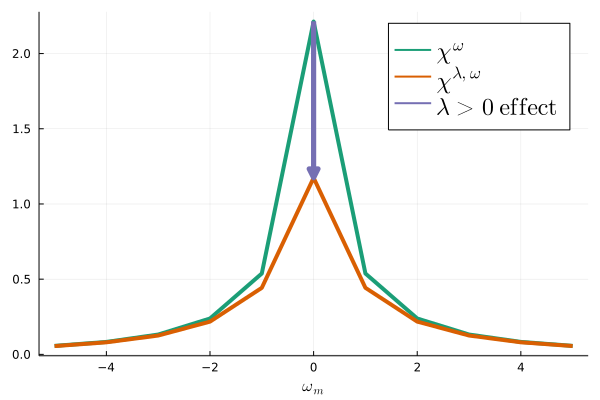

In [155]:

ydata = real.(locQ_sp.χ[1,46:56])
ydata2 = 1 ./ ( 1 ./ ydata .+ 0.4)
plot(-5:5, ydata, label=L"\chi^\omega", xlabel=L"\omega_m",
    palette = :Dark2_5, linewidth=4, legendfontsize=16)
plot!(-5:5, ydata2,
        label=L"\chi^{\lambda,\omega}", linewidth=4, palette = :Dark2_5)

plot!([0,0],[ydata[6], ydata2[6]], arrow=(:open, -10.5), linewidth=5, label=L"\lambda > 0\;\mathrm{ effect}")
#savefig("lambda_eefect.pdf")

In [132]:
ydata2[6]

1.1738592227785543

In [46]:
usable_p = real.(locQ_sp_p.χ[1,:]) .> 0
plot(collect(1:size(locQ_sp_p.χ,2)) .-  sP.n_iω .- 1, real.(locQ_sp.χ[1,:]), ylabel=L"\chi^\omega_\mathrm{m}", xlabel=L"\omega_m", label="improved", markershape=:auto, color=:red)
plot!(collect(1:size(locQ_sp_p.χ,2))[usable_p]  .- sP.n_iω .- 1, real.(locQ_sp_p.χ[1,usable_p]), color=:green, label="plain", markershape=:auto)

LoadError: LoadError: UndefVarError: @L_str not defined
in expression starting at In[46]:2

In [175]:
using Plots.PlotMeasures
using LaTeXStrings
n_iω = sP.n_iω
max_diff = round(maximum(abs.(real(χsp_ed[(0:n_iω) .+ 1] .- locQ_sp.χ[1,n_iω+1:end]))), digits=5)

plot(0:n_iω, real(χsp_ed[(0:n_iω) .+ 1]) , linecolor=nothing,markershape=:circle,markersize=9, mc=:white, msw=2, msc=:orange, label="exact (impurity)")
plot!(collect(-n_iω:n_iω),real(locQ_sp.χ[1,:]), title=L"U = 1, \beta = 14", ylabel=L"\chi_\mathrm{m}^{\omega}",
    xlabel=L"\omega_n", left_margin=5mm, markershape=:cross, color=:red, markersize=5, label="improved")

#lot!(-n_iω:n_iω,real(locQ_sp.χ[1,:]), label="χsp internal", markershape=:auto, markersize=5, linewidth=2)
plot!(collect(-n_iω:n_iω)[usable_p],real(locQ_sp_p.χ[1,usable_p]), alpha=0.7, color=:green, label="plain", markershape=:circle, markersize=5, linewidth=2)
#plot!(-n_iω:n_iω,real.(χsp_ω_int_new_loc_test), label="improved (new)", markershape=:auto,markersize=8,alpha=0.5)
plot!(log.(abs.(real(χsp_ed[(0:n_iω) .+ 1] .- locQ_sp.χ[1, n_iω+1:end]))),inset = (1, bbox(0.08,0.0,0.4,0.4)), subplot = 2
    , label=L"\log(\Delta \chi_\mathrm{m}) \;\mathrm{ new}", color=:red, markershape=:auto,
    xlabel=L"\omega_n", yticks=[-4,-12], legend=:left, left_margin=-30mm)
plot!(log.(abs.(real(χsp_ed[(0:n_iω) .+ 1] .- locQ_sp_p.χ[1,n_iω+1:end]))), label=L"\log(\Delta \chi_\mathrm{m})",
      color=:green, markershape=:auto, subplot = 2)
savefig("error_etr.pdf")

##### 

In [48]:
max_diff = round(maximum(abs.(real(χch_ed[(0:n_iω) .+ 1] .- χch_ω_int_loc_test[n_iω+1:end]))), digits=5)
plot(-n_iω:n_iω,real(χch_ω_int_loc_test[:]), title="ED-Improved max Δ = $(max_diff)",xlabel="ωₙ", ylabel="χch", markershape=:auto, label="χch improved")
#plot!(-n_iω:n_iω, χch_ω_loc_test, markershape=:auto, label="χch improved (old)")
plot!(-n_iω:n_iω,real(locQ_ch.χ[1,:]), label="χch internal", linewidth=2)
plot!(0:n_iω, real(χch_ed[(0:n_iω) .+ 1]), markershape=:auto, label="exact ED")
plot!(-n_iω:n_iω,real.(χch_ω_int_new_loc_test), label="improved (new)", markershape=:auto,markersize=8,alpha=0.5)

LoadError: UndefVarError: χch_ω_int_loc_test not defined

In [49]:
plot(real(λch_ω_int_loc_test[:,51]),markershape=:auto,xlabel="νₙ", ylabel="λch(νₙ,ω₀)", label="impr (new)")
plot!(real(λch_ω_loc_test[:,51]),markershape=:auto, label="impr (old)")
plot!(-real(λch_ed_amp_asym[51:150,101]) .- 1, markershape=:auto, label="asym")
hline!([-real(χch_ω_loc_test[51])], label="χ₀(ω₀) impr (new)")

LoadError: UndefVarError: λch_ω_int_loc_test not defined

In [50]:
plot(real(λsp_ω_int_loc_test[:,51]), markershape=:auto,xlabel="νₙ", ylabel="λsp(νₙ,ω₀)", label="λ impr (new)")
plot!(real(λsp_ω_loc_test[:,51]), markershape=:auto, label="λ impr (old)")
plot!(real(λsp_ed_amp_asym[51:150,101]) .+ 1, markershape=:auto, label="λ exact")
hline!([-real(χsp_ω_loc_test[51])], label="χ₀(ω₀) impr (new)")
hline!([-real(χsp_ω_int_loc_test[51])], label="χ₀(ω₀) impr (old)")

LoadError: UndefVarError: λsp_ω_int_loc_test not defined

In [51]:
xr = n_iω+1:n_iω+50
rtch = real.(helper.χch_asympt)[1:50]
rtsp = real.(helper.χsp_asympt)[1:50]
plot(xr .- 51,-((χsp_ω_loc_test[xr] .- rtsp)),markersize=6, alpha=0.6, markershape=:auto, label="Err χsp")
plot!(xr .- 51,(-(χch_ω_loc_test[xr] .- rtch)),markersize=6, alpha=0.6, markershape=:auto, label="Err χch")

LoadError: UndefVarError: helper not defined

# Non-Local χ₀ sum test

First Plot tests the asymptotic bubble sum from the internal LadderDGA code. The result is plotted against the known asymptotic tail of χ₀[q,ω->oo]

In [52]:
tmp = convert.(ComplexF64, kG.ϵkGrid .+ mP.U*mP.n/2 .- mP.μ)
c1 = mP.U*mP.n/2 - mP.μ + kintegrate(kG, kG.ϵkGrid)
c2_arr = real.(LadderDGA.conv(kG, tmp, tmp))
c3 = real.(kintegrate(kG, tmp .^ 2) + (mP.U^2)*(mP.n/2)*(1-mP.n/2));

χ₀_core_ind = (sP.n_iν_shell+1):(size(bubble.data,2)-sP.n_iν_shell)
χ₀_core = sum(bubble.data[:,χ₀_core_ind,:], dims=[2])[:,1,:] ./ mP.β^2 
χ₀_res = zeros(size(χ₀_core))
χ₀_res2 = zeros(size(χ₀_core))
χ₀_res3 = zeros(size(χ₀_core))
χ₀_res4 = zeros(size(χ₀_core))
χ₀_res5 = zeros(size(χ₀_core))
χ₀_rest_int = LadderDGA.BSE_SC.χ₀_shell_sum_core(mP.β, -sP.n_iω:sP.n_iω, sP.n_iν, Int(sP.shift))
χ₀_rest = χ₀_shell_sum_core_notebook(mP.β, -sP.n_iω:sP.n_iω, sP.n_iν, Int(sP.shift))
for qi = 1:10
for (ωi,ωn) = enumerate(-sP.n_iω:sP.n_iω)
    χ₀_asym_int = bubble.asym
    χ₀_asym = χ₀_shell_sum_notebook(χ₀_rest, ωn, mP.β, c1, c2_arr[qi], c3)
    χ₀_res[qi,ωi] = real((χ₀_core[qi,ωi] + χ₀_asym_int[qi,ωi]) )#* (2*ωn*π/mP.β)^2)
    χ₀_res2[qi,ωi] = real((χ₀_core[qi,ωi]) )#* (2*ωn*π/mP.β)^2)
    χ₀_res3[qi,ωi] = real((χ₀_core[qi,ωi] + χ₀_asym))
    χ₀_res4[qi,ωi] = real((χ₀_core[qi,ωi] + χ₀_asym_int[qi,ωi]) * (2*ωn*π/mP.β)^2)
    χ₀_res5[qi,ωi] = real((χ₀_core[qi,ωi] + χ₀_asym) * (2*ωn*π/mP.β)^2)
end
end

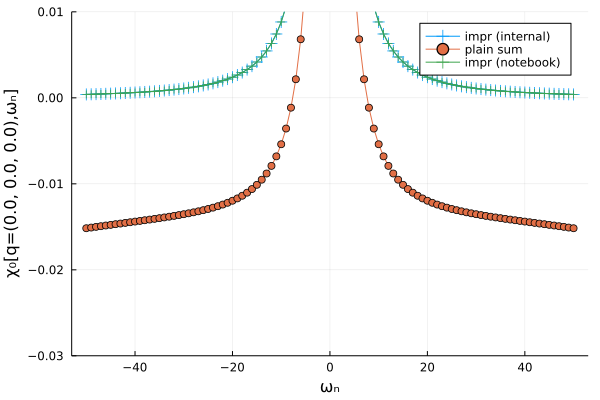

In [53]:
qi_pl = 1
q_v = round.(kG.kGrid[qi_pl],digits=1)
plot(-50:50,χ₀_res[qi_pl,:], markershape=:auto, markersize=6, ylims=(-0.03,0.01), xlabel="ωₙ", ylabel="χ₀[q=$q_v,ωₙ]", label="impr (internal)")
plot!(-50:50,χ₀_res2[qi_pl,:], markershape=:auto, label="plain sum")
plot!(-50:50,χ₀_res3[qi_pl,:], markershape=:auto, label="impr (notebook)")

In [54]:
m = mP.Ekin_DMFT/(6*kG.t)
b = (2 * mP.Epot_DMFT + mP.Ekin_DMFT - mP.U*(mP.n^2)/2)
plot(-χ₀_res4[:,end], label="χ₀[q,ω->oo] (LadderDGA internal)", markershape=:auto, markersize=6, 
    xticks=(1:10,map(x -> round.(x,digits=1),kG.kGrid[:])), xrotation = 30,color=ColorSchemes.seaborn_muted)
plot!(-χ₀_res5[:,end], markershape=:auto, markersize=3, label="χ₀[q,ω->oo]" )
plot!( m .* kG.ϵkGrid .+ b, label="m * ϵ[q] + b")
#plot!( -2.6 .* kG.ϵkGrid .- 6.5,label="auch richtig")

LoadError: MethodError: no method matching plot_color(::ColorScheme{Vector{RGB{Float64}}, String, String})
[0mClosest candidates are:
[0m  plot_color(::Any, [91m::Number[39m) at ~/.julia/packages/PlotUtils/jNTYY/src/colors.jl:23
[0m  plot_color(::Any, [91m::Nothing[39m) at ~/.julia/packages/PlotUtils/jNTYY/src/colors.jl:20
[0m  plot_color([91m::AbstractArray{T}[39m) where T<:Number at ~/.julia/packages/PlotUtils/jNTYY/src/colors.jl:54
[0m  ...

In [55]:
gImp_slice = -50:49
λ_asym_test = (((locQ_sp.γ[1,:,51] .* (1 .+ mP.U .* locQ_sp.χ[1, 51]) .- 1) ./ (-mP.U)) .- 1);
print("Δ (χ₀Loc - gImp * gImp * (-mP.β))")
maximum(abs.(χ₀Loc.data[1,χ₀_core_ind,51] .- (-mP.β).*gImp[1,gImp_slice].*gImp[1,gImp_slice]))

Δ (χ₀Loc - gImp * gImp * (-mP.β))

7.105427357601002e-15

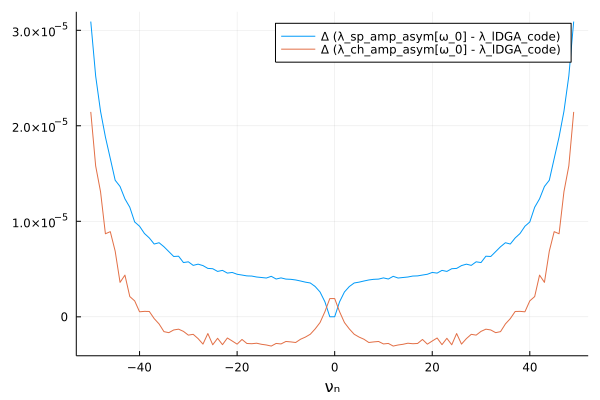

In [56]:
ωi = 51
ωn = ωi - sP.n_iω - 1
asym_slice = (51:150) .- trunc(Int, ωn/2)
asym_omega = ωi + 50
#λsp_asym_test = (((locQ_sp.γ[1,:,ωi] .* (1 .+ mP.U .* locQ_sp.χ[1, ωi]) .- 1)  .- 1);
#(1 .- s*λ_out) ./ (1 .+ s*mP.U .* χ[qi, ωi])
s = 1
λsp_asym = -( locQ_sp.γ[1,:,ωi] .* (1 .+ s*mP.U .* locQ_sp.χ[1, ωi]) ) .+ 1
s = -1
λch_asym = -(locQ_ch.γ[1,:,ωi] .* (1 .+ s*mP.U .* locQ_ch.χ[1, ωi]) ) .+ 1

plot(-50:49,real.(λsp_ed_amp_asym[asym_slice,asym_omega] .+ 1 .- λsp_asym), xlabel="νₙ", label="Δ (λ_sp_amp_asym[ω_$ωn] - λ_lDGA_code)")
plot!(-50:49,real.(λch_ed_amp_asym[asym_slice,asym_omega] .+ 1 .- λch_asym), xlabel="νₙ", label="Δ (λ_ch_amp_asym[ω_$ωn] - λ_lDGA_code)")
#plot!(-50:49,real.(λsp_ed_asym[asym_slice,asym_omega] .- λsp_asym .* (χ₀Loc[1,11:110,ωi]/(-mP.β))), label="Δ (λ_asym - λ_lDGA_code .* χ₀/(-β))")

In [57]:
using LinearAlgebra
#include("/home/julian/Hamburg/BSE_SC.jl/src/build_chi_asympt.jl")

function build_diag_updo(ωn, χ₀, h)
    i1_l = h.ind1_list
    i2_l = view(h.ind2_list, :, ωn)
    fill!(h.diag_asym_buffer, 0)
    for i in 1:length(i1_l)
        i1 = h.I_asympt[i]
        i2 = i1_l[i]
        i3 = i2_l[i]
        h.diag_asym_buffer[i1[1]] += (mP.U^2)*(h.χch_asympt[i2] - h.χpp_asympt[i3])*(-χ₀[i1[2]])/mP.β^2
    end
end
c2 = mP.μ-mP.U*(mP.n/2)
c3 = (mP.μ-mP.U*(mP.n/2))^2 + mP.sVk + mP.U^2 * (mP.n/2) * (1 - mP.n/2);
bs_old = calc_χ₀_shell_sum_old(mP.β, c2, c3, n_iω, n_iν, Int64(sP.shift));

function improve_λ₀2(type, kG, χ₀, locQ, F, h)
    s = (type == :ch) ? -1 : +1
    tmp = convert.(ComplexF64, kG.ϵkGrid .+ mP.U*mP.n/2 .- mP.μ)
    Nq = size(χ₀.data,1)
    Nν = length(-sP.n_iν:sP.n_iν-1)
    Nω = size(χ₀.data,3)

    χ₀_rest = χ₀_shell_sum_core(mP.β, -sP.n_iω:sP.n_iω, sP.n_iν, Int(sP.shift))
    
    res = zeros(ComplexF64, Nq, Nν, Nω)
    res2 = similar(res)
    res3 = similar(res)
    res3 = similar(res)
    res4 = similar(res)
    for ωi in 1:Nω
        ωn = ωi - sP.n_iω - 1
        ind_core = (h.Nν_shell+1):(size(χ₀.data,2)-h.Nν_shell)
        λ_asym = -(locQ.γ[1,:,ωi] .* (1 .+ s*mP.U .* locQ.χ[1, ωi]) ) .+ 1
        for qi in 1:Nq
            λcore = [s*dot(χ₀.data[qi,ind_core,ωi], F[νi,:,ωi] )/(mP.β^2) for νi in 1:size(F,1)]
            χ₀_asym = χ₀.asym[qi,ωi]
            LadderDGA.BSE_SC.F_diag!(type, ωn, mP.U, mP.β, χ₀.data[qi,:,ωi], h)
            res[qi,:,ωi] = λcore 
            res2[qi,:,ωi]  = χ₀_asym.*mP.U.*(λ_asym)
            res3[qi,:,ωi] .= -χ₀_asym.*mP.U.*(1)
            res4[qi,:,ωi]  = view(h.diag_asym_buffer, ind_core)
                    #view(h.diag_asym_buffer, ind_core) .+ (λ_loc_ω[ωi] .- s)*mP.U*(χ₀_asym)
        end
    end
    return res, res2, res3, res4
end
Σ_loc_offs = OffsetArray(cat(conj(reverse(Σ_loc)),Σ_loc_in, dims=1),-length(Σ_loc):length(Σ_loc)-1)
core_sp, asym_1_sp, asym_2_sp, asym_3_sp = improve_λ₀2(:sp, kG, bubble, locQ_sp, Fsp, sP.χ_helper);
core_ch, asym_1_ch, asym_2_ch, asym_3_ch = improve_λ₀2(:ch, kG, bubble, locQ_ch, Fch, sP.χ_helper);
r1_ch = core_ch .+ asym_1_ch .+ asym_2_ch .+ asym_3_ch;
r1_sp = core_sp .+ asym_1_sp .+ asym_2_sp .+ asym_3_sp;

In [58]:
λ0Loc_int = calc_λ0(χ₀Loc, Fsp, locQ_sp, mP, sP);
λ0_int = calc_λ0(bubble, Fsp, locQ_sp, mP, sP);
r1_sp_full_int = to_m_index(λ0_int, sP);
r1_sp_full = to_m_index(r1_sp, sP);
r1_ch_full = to_m_index(r1_ch, sP);

sp: fit: 0.0951, Σ_loc: -0.0979, left-right: 0.097689, q = (3.14, 0.0, 0.0)


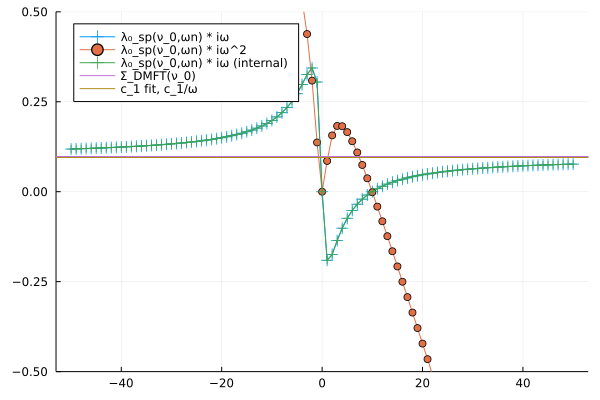

In [59]:
using LsqFit
qi = 5
νi = 51
νn = νi - sP.n_iν - 1
ωrange_s = -sP.n_iω:sP.n_iω
iω_n_arr = OffsetArray(2*im*(ωrange_s)*π/mP.β,ωrange_s)
Σ_loc_os = OffsetArray(cat(conj(reverse(Σ_loc)),Σ_loc, dims=1),-length(Σ_loc):length(Σ_loc)-1)

fitr = 30:50
@. model(x, p) = real.(p[1] + p[2]/x + p[3]/x^2)
xdata = imag.(iω_n_arr[fitr])
p0 = [0.0, 0.0, 0.0, 0.0]

yd = r1_sp_full[qi,νn,:] .* iω_n_arr
ydata_sp_impr2 = imag(yd[fitr])
fit2 = curve_fit(model, xdata, ydata_sp_impr2, p0)
lmr_sp = imag(yd[50]+yd[-50])/2
println("sp: fit: $(round(fit2.param[1],digits=4)), Σ_loc: $(round(imag(Σ_loc_os[νi-51]),digits=4)), left-right: $(round(lmr_sp,digits=6)), q = $(round.(kG.kGrid[qi],digits=2))")

p1 = plot(ωrange_s,imag.(r1_sp_full[qi,νn,:].parent .* iω_n_arr.parent), markersize=6, ylims=(-0.5,0.5), legend=:topleft, markershape=:auto, label="λ₀_sp(ν_$(νn),ωn) * iω")
plot!(ωrange_s,real.(r1_sp_full[qi,νn,:].parent .* iω_n_arr.parent.^2 ), markershape=:auto, label="λ₀_sp(ν_$(νn),ωn) * iω^2")
plot!(ωrange_s,imag.(r1_sp_full_int[qi,νn,:].parent .* iω_n_arr.parent ), markershape=:auto, label="λ₀_sp(ν_$(νn),ωn) * iω (internal)")
#plot!(imag.(core_ch[1,51,1:end] .* iω_i_arr[1:end]), markershape=:auto)
hline!([ -imag(Σ_loc_os[νn])], label="Σ_DMFT(ν_$(νn))")
hline!([ fit2.param[1]], label="c_1 fit, c_1/ω")

In [60]:
using LsqFit
using Optim
qi = 1
νi = 51
νn = νi - sP.n_iν - 1
ωrange_s = -sP.n_iω:sP.n_iω
iω_n_arr = OffsetArray(2*im*(ωrange_s)*π/mP.β,ωrange_s)
Σ_loc_os = OffsetArray(cat(conj(reverse(Σ_loc)),Σ_loc, dims=1),-length(Σ_loc):length(Σ_loc)-1)


fitr = 20:50
@. model(x, p) = real.(p[1] + p[2]/x + p[3]/x^2)
xdata = imag.(iω_n_arr[fitr])
p0 = [imag(Σ_loc_os[νi-51]), 1.0, 1.0]

yd = r1_ch_full[qi,νn,:] .* iω_n_arr
ydata_ch_impr2 = imag(yd[fitr])
fit2 = curve_fit(model, xdata, ydata_ch_impr2, p0)


lmr_ch = imag(yd[50]+yd[-50])/2
println("ch: fit: $(round(fit2.param[1],digits=4)), Σ_loc: $(round(imag(Σ_loc_os[νi-51]),digits=4)), left-right: $(round(lmr_ch,digits=6))")
p1 = plot(ωrange_s,imag.(r1_ch_full[1,νn,:].parent .* iω_n_arr.parent), ylims=(-0.5,0.5), legend=:topleft, markershape=:auto, label="λ₀_ch(ν_$(νn),ωn) * iω")
plot!(ωrange_s,real.(r1_ch_full[1,νn,:].parent .* iω_n_arr.parent.^2 ), markershape=:auto, label="λ₀_ch(ν_$(νn),ωn) * iω^2")
#plot!(imag.(core_ch[1,51,1:end] .* iω_i_arr[1:end]), markershape=:auto)
hline!([ imag(Σ_loc_os[νn])], label="Σ_DMFT(νn=$(νn))")
hline!([ fit2.param[1]], label="c_1 fit, c_1/ω")
hline!([lmr_ch], label="avg")

LoadError: ArgumentError: Package Optim not found in current path:
- Run `import Pkg; Pkg.add("Optim")` to install the Optim package.


In [61]:
λ_sp_out = to_m_index(λsp_ω_loc_test, sP)
λ_ch_out = to_m_index(λch_ω_loc_test, sP)
ωrange = -n_iω:n_iω
ωl_s = length(ωrange)
iω_n_arr = OffsetArray(2*im*(ωrange)*π/β,ωrange)
xr = 10:45
νn_test = 0
plot(imag(λ_sp_out[νn_test,xr] .* iω_n_arr[xr]), markershape=:auto, label="λsp[iν_$νn_test] * iω", legend=:bottomright)
plot!(imag(λ_ch_out[νn_test,xr] .* iω_n_arr[xr]), markershape=:auto, label="λch[iν_$νn_test] * iω")
hline!(imag.([Σ_loc_offs[νn_test]]), label="Im(Σ_DMFT[iν_$νn_test])")
hline!(-imag.([Σ_loc_offs[νn_test]]), label="-Im(Σ_DMFT[iν_$νn_test])")

LoadError: UndefVarError: λsp_ω_loc_test not defined

# Non-Local χ_r,  λ_r, tests


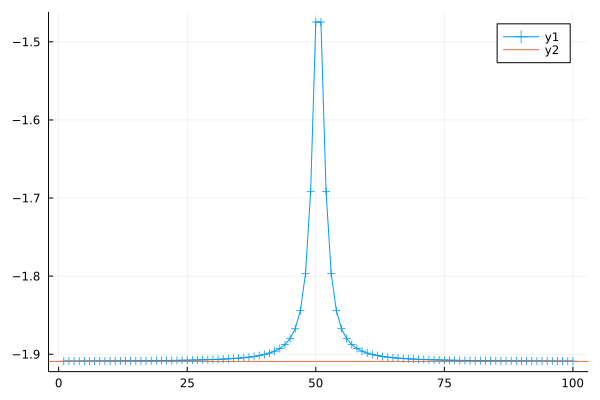

In [62]:
s = 1 # sp => 1, ch => -1
qi = 1
λtest = 1 .- s*nlQ_sp.γ[qi,:,51] .* (1 .+ s*mP.U .* nlQ_sp.χ[qi, ωi])
plot(real(λtest), markershape=:auto)
hline!([-s*real(nlQ_sp.χ[qi,51])])

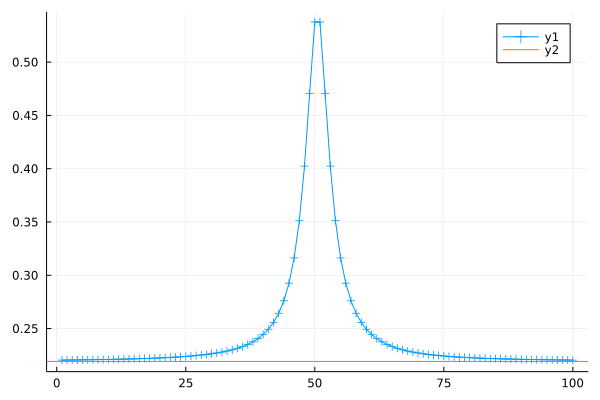

In [63]:
s = -1 # sp => 1, ch => -1
qi = 1
λtest = 1 .- nlQ_ch.γ[qi,:,51] .* (1 .+ s*mP.U .* nlQ_ch.χ[qi, ωi])
plot(real(λtest), markershape=:auto)
hline!([-s*real(nlQ_ch.χ[qi,51])])

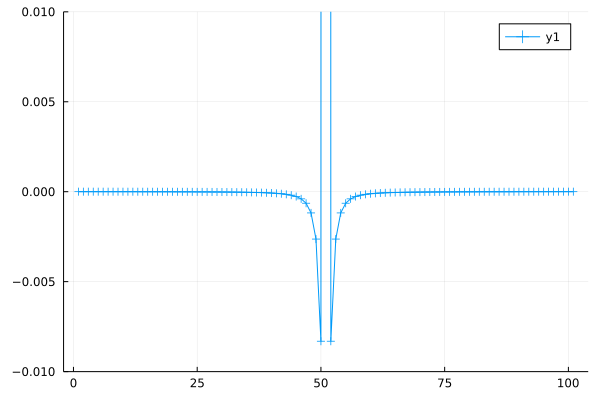

In [64]:
plot(real(nlQ_sp.χ[1,:]), markershape=:auto, ylims=(-0.01,0.01))

In [65]:
function F_diag_notebook!(type::Symbol, ωn::Int, U::Float64, β::Float64, χ₀::AbstractArray{ComplexF64,1}, h)
    i1_l = h.ind1_list
    i2_l = view(h.ind2_list, :, ωn)
    fill!(h.diag_asym_buffer, 0)
    if type == :sp
        for i in 1:length(i1_l)
            i1 = h.I_asympt[i]
            i2 = i1_l[i]
            i3 = i2_l[i]
            h.diag_asym_buffer[i1[1]] += ((U^2/2)*h.χch_asympt[i2] -   (U^2/2)*h.χsp_asympt[i2] + (U^2)*h.χpp_asympt[i3])*(-χ₀[i1[2]])/β^2
        end
    elseif type == :ch
        for i in 1:length(i1_l)
            i1 = h.I_asympt[i]
            i2 = i1_l[i]
            i3 = i2_l[i]
            h.diag_asym_buffer[i1[1]] += ((U^2/2)*h.χch_asympt[i2] + 3*(U^2/2)*h.χsp_asympt[i2] - (U^2)*h.χpp_asympt[i3])*(-χ₀[i1[2]])/β^2
        end
    else
        error("Unrecognized type $(type) for F_diag! Expected sp/ch")
    end
end


function calc_χλ_impr_notebook(type::Symbol, ωn::Int, χ::AbstractArray{ComplexF64,2}, χ₀::AbstractArray{ComplexF64,1}, 
                 U::Float64, β::Float64, χ₀_asym::ComplexF64, h)
    s = type == :ch ? -1 : 1
    ind_core = (h.Nν_shell+1):(size(χ₀,1)-h.Nν_shell)
    χ₀_core = view(χ₀,ind_core)
    λ_core = -s*sum(χ,dims=[2])[:,1] ./ χ₀_core .+ s
    χ_core = sum(χ) /β^2
    F_diag_notebook!(type, ωn, U, β, χ₀, h)
    λ = (λ_core .- s*view(h.diag_asym_buffer, ind_core) .- U*χ₀_asym)/(1-s*U*χ₀_asym)
    λ_s = -sum((U .* λ .- s*U) .* χ₀_core)/β^2
    diag_asym_s = -sum(h.diag_asym_buffer .* χ₀)/β^2
    t1 = χ_core
    t2 = χ₀_asym*(1+2*λ_s+s*U*χ₀_asym)
    t3 = -χ₀_asym*diag_asym_s
    t4 = 1-U^2 * χ₀_asym^2
    χ_out = (χ_core + χ₀_asym*(1+2*λ_s+s*U*χ₀_asym) - diag_asym_s)/(1-U^2 * χ₀_asym^2)
    return χ_out, λ, [t1, t2, t3, t4]
end



νrange = -sP.n_iν:sP.n_iν-1
ωrange = -sP.n_iω:sP.n_iω
Niν = length(νrange)
Niω = length(ωrange)
Nq  = length(kG.kGrid)
_eltype = ComplexF64
χννpω = Array{_eltype,3}(undef, Niν, Niν, Nq)
Γr = Γch
χ_test = Matrix{_eltype}(undef, Nq, Niω)
λ_test = Array{_eltype,3}(undef, Nq, Niν, Niω)
dbg_test = Array{_eltype,3}(undef, Nq, Niω, 4)
type = :sp
for qi in 1:Nq
    for (ωi,ωn) in enumerate(ωrange)
        χννpω[:,:,qi] = deepcopy(Γr[:,:,ωi])
        for (l,νn) in enumerate(νrange)
            χννpω[l,l,qi] = Γr[l,l,ωi] + 1.0/bubble.data[qi,sP.n_iν_shell+l,ωi]
        end
        χννpω[:,:,qi] = inv(view(χννpω,:,:,qi))
        χ_test[qi, ωi], λ_test[qi,:,ωi],dbg_test[qi,ωi,:] = calc_χλ_impr_notebook(type, ωn, χννpω[:,:,qi], view(bubble.data,qi,:,ωi),
                mP.U, mP.β, bubble.asym[qi,ωi], sP.χ_helper);
    end
end

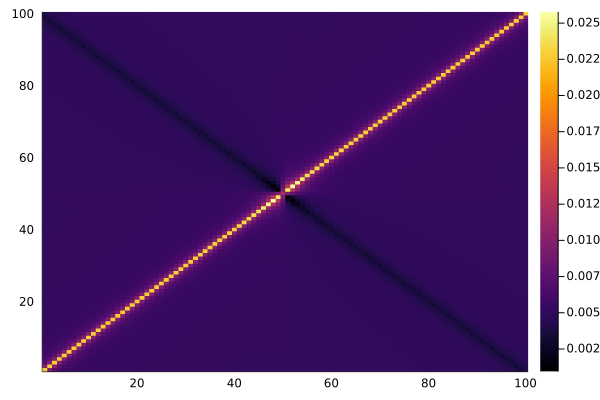

In [66]:
heatmap(real((Γr[:,:,52])))

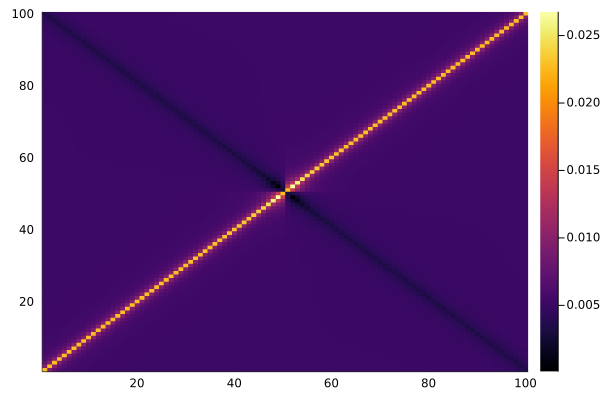

In [67]:
heatmap(real((Γr[:,:,51])))

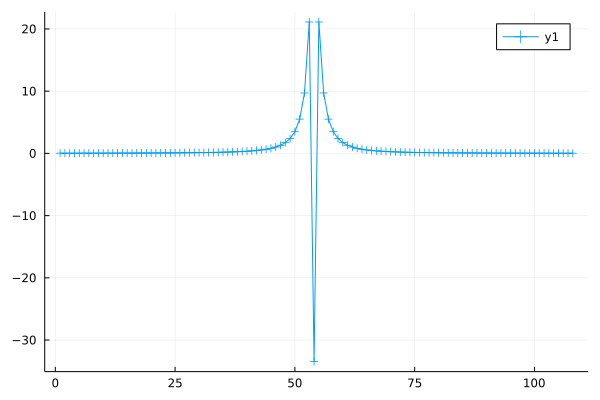

In [68]:
plot(real(χ₀Loc.data[1,:,52]), markershape=:auto)

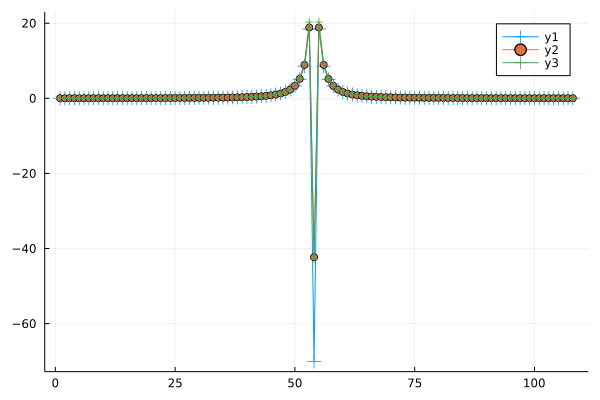

In [69]:
plot(real(bubble.data[1,:,52]), markersize=7, markershape=:auto)
plot!(real(bubble.data[2,:,52]), markershape=:auto)
plot!(real(bubble.data[3,:,52]), markershape=:auto)

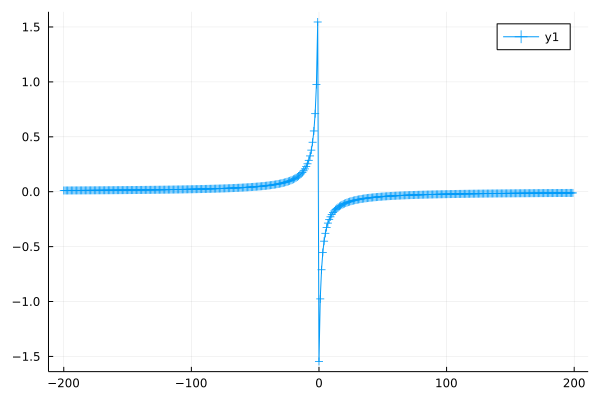

In [70]:
plot(imag(gImp[1,:]),markershape=:auto)

In [71]:
max_diff = round(maximum(abs.(real(χsp_ed[(0:n_iω) .+ 1] .- χsp_ω_int_loc_test[n_iω+1:end]))), digits=5)
plot(-n_iω:n_iω,real(χsp_ω_int_loc_test[:]), title="ED-Improved max Δ = $(max_diff)",xlabel="ωₙ", ylabel="χsp", markershape=:auto, label="χsp improved")
plot!(-n_iω:n_iω,χsp_ω_loc_test, label="χsp improved (old)")
plot!(-n_iω:n_iω,real(locQ_sp.χ[1,:]), label="χsp internal", linewidth=2)
plot!(0:n_iω, real(χsp_ed[(0:n_iω) .+ 1]), label="exact ED")

LoadError: UndefVarError: χsp_ω_int_loc_test not defined

In [72]:
using DelimitedFiles
function write_csv() 
    νr_out = -50:50
    for (ii,i) in enumerate(ωrange_s)
        writedlm("lambda_phys_$(lpad(ii-1, 3, "0")).csv", [collect(νr_out) real.(λ_ch_out[νr_out,i]) imag.(λ_ch_out[νr_out,i]) real.(λ_sp_out[νr_out,i]) imag.(λ_sp_out[νr_out,i])], "        \t")
    end
end
#write_csv()

write_csv (generic function with 1 method)

# Self Energy Tests

Improved asymptotics tests for Σ_loc (lDGA EoM, local case), non-local λʳ(q) and λʳ₀(q) = χʳ₀(q) ⋆ Fʳ

## Comments

Σν_lDGA and Σν_direct do not have a 1/x tail, since all λ tails cancel each other out.

In [73]:
γsp_loc_test = (1 .- λsp_ω_loc_test)./transpose(1 .+ U .* χsp_ω_loc_test)
γch_loc_test = (1 .+ λch_ω_loc_test)./transpose(1 .- U .* χch_ω_loc_test)
Σ_h = n*U/2


ωrange = -n_iω:n_iω
νrange = -2*n_iν:2*n_iν
ωl = length(ωrange)
νl = length(νrange)
ωrange_s = -n_iω:n_iω
ωl_s = length(ωrange_s)
#Σ_loc_os = OffsetArray(cat(conj(reverse(Σ_loc)),Σ_loc, dims=1),-length(Σ_loc):length(Σ_loc)-1)
Σν_direct = OffsetArray(zeros(ComplexF64, νl),νrange)
Σν_lDGA =  OffsetArray(zeros(ComplexF64, νl),νrange)
Σ_loc_of = OffsetArray(cat(conj(reverse(Σ_loc_in)),Σ_loc_in, dims=1),-length(Σ_loc_in):length(Σ_loc_in)-1)
iω_n_arr = OffsetArray(2*im*(ωrange_s)*π/β,ωrange_s)
ω_sub = OffsetArray(zeros(ComplexF64, νl),νrange)
λ_sp_out = OffsetArray(zeros(ComplexF64, νl,ωl), νrange, ωrange)
λ_ch_out = OffsetArray(zeros(ComplexF64, νl,ωl), νrange, ωrange)
dbg1 = OffsetArray(zeros(ComplexF64, νl,ωl,6), νrange, ωrange, 1:6)
νn_test = 0
for ωi in 1:size(λch_ω_loc_test,2)
    for νi in 1:size(λch_ω_loc_test,1)
        ωn,νn = OneToIndex_to_Freq(ωi, νi, n_iω, n_iν, shift)
        Σν_direct[νn] += -(U/β) * 0.5 * (λch_ω_loc_test[νi,ωi] + λsp_ω_loc_test[νi,ωi]) * gImp_loc_test[νn + ωn]
        Σν_lDGA[νn] += -(U/β) * (0.5 * γch_loc_test[νi,ωi]*(1-U*χch_ω_loc_test[ωi]) - 1.5*γsp_loc_test[νi,ωi]*(1+U*χsp_ω_loc_test[ωi]) + 1)*gImp_loc_test[νn + ωn] + (U/β) * (λsp_ω_loc_test[νi,ωi]) * gImp_loc_test[νn + ωn]
        subt = (ωn != 0) ? 1/((2π*im*ωn/β)^2) : 0
        ω_sub[νn] += subt
        dbg1[νn,ωn, 1] = γch_loc_test[νi,ωi]
        dbg1[νn,ωn, 2] = 0.5 *(1-U*χch_ω_loc_test[ωi])
        dbg1[νn,ωn, 3] = γsp_loc_test[νi,ωi]
        dbg1[νn,ωn, 4] = 1.5*(1+U*χsp_ω_loc_test[ωi])
        dbg1[νn,ωn, 5] = λsp_ω_loc_test[νi,ωi]
        dbg1[νn,ωn, 6] = gImp_loc_test[νn + ωn]
    end
end
#Σν_lDGA_sub = Σν_lDGA[0:n_iν-1] ./ (1 .- U*β/12 .- (U/β)*ω_sub[0:n_iν-1])#
#Σν_direct_sub = Σν_direct[0:n_iν-1] ./  (1 .- U*β/12 .- (U/β)*ω_sub[0:n_iν-1]);

LoadError: UndefVarError: λsp_ω_loc_test not defined

In [74]:
using Dispersions 
ν0Index_of_ωIndex = LadderDGA.ν0Index_of_ωIndex
ν_axis = LadderDGA.ν_axis
q_axis = LadderDGA.q_axis


function calc_Σ_ω_notebook2!(Σ::AbstractArray{ComplexF64,3}, Kνωq::Array{ComplexF64}, Kνωq_pre::Array{ComplexF64, 1},
            ωindices::AbstractArray{Int,1},
            Q_sp::NonLocalQuantities, Q_ch::NonLocalQuantities, 
            Gνω::GνqT, λ₀::AbstractArray{ComplexF64,3}, U::Float64, kG, 
            sP::SimulationParameters)
    fill!(Σ, zero(ComplexF64))
    nd = length(gridshape(kG))
    dbg1 = OffsetArray(zeros(ComplexF64, νl,ωl,6), νrange, ωrange, 1:6)
    
    for ωi in 1:size(Q_sp.γ,3)
        fsp = 1.5 .* (1 .+ U .* view(Q_sp.χ,:,ωi))
        fch = 0.5 .* (1 .- U .* view(Q_ch.χ,:,ωi))
        for νi in 1:size(Q_sp.γ,2)
            ωn, νn = LadderDGA.OneToIndex_to_Freq(ωi, νi, sP)
            if νn >= 0 && νn < sP.n_iν
            v = Gνω[:,νn + ωn]
            if kG.Nk == 1
                    #Σν_lDGA[νn] += -(U/β) * (0.5 * γch_loc_test[νi,ωi]*(1-U*χch_ω_loc_test[ωi]) - 1.5*γsp_loc_test[νi,ωi]*(1+U*χsp_ω_loc_test[ωi]) + 1)*gImp_loc_test[νn + ωn] + (U/β) * (λsp_ω_loc_test[νi,ωi]) * gImp_loc_test[νn + ωn]

                Σ[1,νn,ωn] = -(U) * ((Q_ch.γ[1,νi,ωi]) * fch[1] - Q_sp.γ[1,νi,ωi] * fsp[1] + 1.5 - 0.5 - λ₀[1,νi,ωi]) * v[1]
            dbg1[νn,ωn, 1] = Q_ch.γ[1,νi,ωi]
            dbg1[νn,ωn, 2] = fch[1]
            dbg1[νn,ωn, 3] = Q_sp.γ[1,νi,ωi]
            dbg1[νn,ωn, 4] = fsp[1]
            dbg1[νn,ωn, 5] = λ₀[1,νi,ωi]
            dbg1[νn,ωn, 6] = v[1]
            else
                @simd for qi in 1:size(Σ,q_axis)
                    @inbounds Kνωq_pre[qi] = -(U) * ((Q_ch.γ[qi,νi,ωi]) * fch[1] - Q_sp.γ[qi,νi,ωi] * fsp[qi] + 1.5 - 0.5 - λ₀[qi,νi,ωi])
                end
                conv_fft1!(kG, view(Σ,:,νn,ωn), Kνωq_pre, v)
            end
            end
        end
    end
    return dbg1
end


Nq = size(locQ_sp.χ,1)
Nω = size(locQ_sp.χ,2)
ωrange = -sP.n_iω:sP.n_iω
Σ_hartree = mP.n * mP.U/2.0;
ωindices = (sP.dbg_full_eom_omega) ? (1:Nω) : intersect(locQ_sp.usable_ω, locQ_ch.usable_ω)
Kνωq = Array{ComplexF64, length(LadderDGA.gridshape(kG))}(undef, LadderDGA.gridshape(kG)...)
Kνωq_pre = Array{ComplexF64, 1}(undef, length(kG.kMult))
Σ_ladder_ω_notebook  = OffsetArray( 
                         Array{Complex{Float64},3}(undef,Nq, sP.n_iν, length(ωrange)),
                         1:Nq, 0:sP.n_iν-1, ωrange)
Σ_ladder_ω_notebook2 = OffsetArray( 
                         Array{Complex{Float64},3}(undef,Nq, sP.n_iν, length(ωrange)),
                         1:Nq, 0:sP.n_iν-1, ωrange)
kGridLoc = LadderDGA.gen_kGrid("3Dsc-0.2041241452319315", 1)
λ₀Loc = calc_λ0(χ₀Loc, Fsp, locQ_sp, mP, sP)
#calc_Σ_ω_notebook!(Σ_ladder_ω_notebook, Kνωq, Kνωq_pre, ωindices, locQ_sp, locQ_ch, gImp, λ₀Loc, mP.U, kGridLoc, sP)
dbg2 = calc_Σ_ω_notebook2!(Σ_ladder_ω_notebook2, Kνωq, Kνωq_pre, ωindices, locQ_sp, locQ_ch, gImp, λ₀Loc, mP.U, kGridLoc, sP);
tt2 = sum(Σ_ladder_ω_notebook2.parent, dims=3)[1,:,1] ./mP.β;

LoadError: UndefVarError: νl not defined

In [75]:
xr = 0:79
tt = sum(Σ_ladder_ω_notebook2.parent, dims=3)[1,:,1] ./ mP.β
plot(xr, imag(Σ_loc_of[xr]), markershape=:auto,markersize=8, label="Σ DMFT", size=(600,400))
plot!(xr, imag.(Σν_direct)[xr], markershape=:auto, legend=:bottomright, label="EoM direct")
#plot!(xr, imag(Σν_direct_sub[xr .+ 1]), markershape=:auto, label="Σ direct_sub")
plot!(xr, imag(Σν_lDGA[xr]), markershape=:auto, label="Σ lDGA")
plot!(0:49, imag(Σ_ladderLoc[1,0:49]) , markershape=:auto, label="Σ lDGA int", markersize=10,alpha=0.5)
plot!(0:49, imag(tt2[1:50]) , markershape=:auto, label="Σ lDGA internal_test")
vline!([sP.n_iν], label="nFermi")

LoadError: UndefVarError: Σ_loc_of not defined

## Non-Local EoM

In [76]:
λ₀ = calc_λ0(bubble, Fsp, locQ_sp, mP, sP)
Σ_ladder = calc_Σ(nlQ_sp, nlQ_ch, λ₀, gLoc_fft, kG, mP, sP);
Σ_ladder_ν = dropdims(kintegrate(kG, Σ_ladder, 1), dims=1);

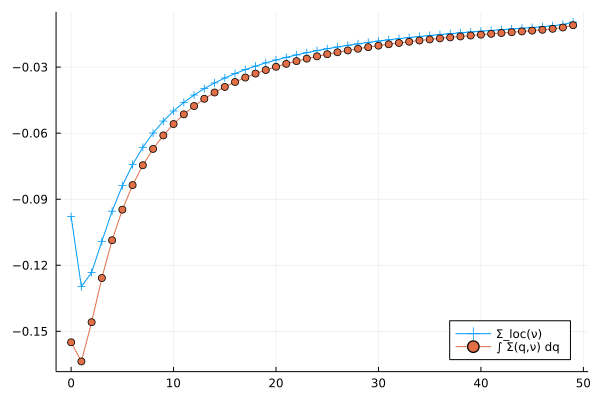

In [77]:
plot(0:49, imag(Σ_ladderLoc[1,0:49]), label="Σ_loc(ν)", size=(600,400), markershape=:auto)
plot!(imag(Σ_ladder_ν), label="∫ Σ(q,ν) dq", markershape=:auto, legend=:bottomright)

# Lambda corrections
## sp

In [78]:
λsp_old = λ_correction(:sp, imp_density, Fsp, Σ_loc, Σ_ladderLoc, nlQ_sp, nlQ_ch, locQ_sp, bubble, gLoc_fft, kG, mP, sP)

LoadError: MethodError: no method matching λ_correction(::Symbol, ::Float64, ::Array{ComplexF64, 3}, ::Vector{ComplexF64}, ::OffsetMatrix{ComplexF64, Matrix{ComplexF64}}, ::NonLocalQuantities, ::NonLocalQuantities, ::NonLocalQuantities, ::χ₀T, ::OffsetMatrix{ComplexF64, Matrix{ComplexF64}}, ::KGrid{cP, 3}, ::ModelParameters, ::SimulationParameters)
[0mClosest candidates are:
[0m  λ_correction(::Symbol, ::Float64, [91m::NonLocalQuantities[39m, [91m::NonLocalQuantities[39m, ::OffsetMatrix{ComplexF64, Matrix{ComplexF64}}, [91m::Array{ComplexF64, 3}[39m, [91m::KGrid[39m, [91m::ModelParameters[39m, [91m::SimulationParameters[39m; workerpool, init_sp, init_spch, parallel) at ~/Hamburg/Julia_lDGA/LadderDGA.jl/src/lambdaCorrection.jl:239

In [79]:
λnew = LadderDGA.extended_λ_clean(nlQ_sp, nlQ_ch, gLoc_fft, 
                    λ₀, kG, mP, sP)

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.1, 0.1]
 * Zero: [0.0004431981991828993, -0.037761967850068204]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [80]:
λnew = λ_correction(:sp_ch, imp_density, Fsp, Σ_loc, Σ_ladderLoc, nlQ_sp, nlQ_ch, locQ_sp, bubble, gLoc_fft, kG, mP, sP)

LoadError: MethodError: no method matching λ_correction(::Symbol, ::Float64, ::Array{ComplexF64, 3}, ::Vector{ComplexF64}, ::OffsetMatrix{ComplexF64, Matrix{ComplexF64}}, ::NonLocalQuantities, ::NonLocalQuantities, ::NonLocalQuantities, ::χ₀T, ::OffsetMatrix{ComplexF64, Matrix{ComplexF64}}, ::KGrid{cP, 3}, ::ModelParameters, ::SimulationParameters)
[0mClosest candidates are:
[0m  λ_correction(::Symbol, ::Float64, [91m::NonLocalQuantities[39m, [91m::NonLocalQuantities[39m, ::OffsetMatrix{ComplexF64, Matrix{ComplexF64}}, [91m::Array{ComplexF64, 3}[39m, [91m::KGrid[39m, [91m::ModelParameters[39m, [91m::SimulationParameters[39m; workerpool, init_sp, init_spch, parallel) at ~/Hamburg/Julia_lDGA/LadderDGA.jl/src/lambdaCorrection.jl:239

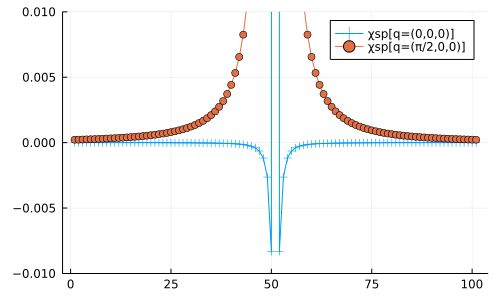

In [81]:
plot(real(nlQ_sp.χ[1,:]), size=(500,300), markershape=:auto, label="χsp[q=(0,0,0)]",ylims=(-0.01,0.01))
plot!(real(nlQ_sp.χ[2,:]), size=(500,300), markershape=:auto, label="χsp[q=(π/2,0,0)]")